## Import Data and Libraries

In [59]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
pd.set_option('display.max_columns', 50)

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.neural_network import MLPClassifier
from tabulate import tabulate

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import sklearn.metrics as metrics
import joblib

In [61]:
# (EDA  ++  Preprocessing)  ->   Feature Selection/Feature Eng    ->   Baseline Modeling   ->   Hyperparameter Tuning  -> Extras

In [119]:
df = pd.read_csv("../Data/RTA Dataset.csv")

## EDA

In [120]:
pd.set_option('display.max_columns', 32)
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
794,10:07:00,Monday,Over 51,Male,Writing & reading,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,2,2,Going straight,Passenger,Female,Under 18,3,Other,Normal,Not a Pedestrian,No distancing,Slight Injury
8796,23:35:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (13?45 seats),Owner,Unknown,NaN,Industrial areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - no lighting,Raining,Vehicle with vehicle collision,1,1,Going straight,Pedestrian,Female,18-30,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
2424,18:00:00,Tuesday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Below 1yr,NaN,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Other,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Going straight,Passenger,Female,31-50,3,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
1427,22:48:00,Monday,Over 51,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Wet or damp,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
7234,17:00:00,Saturday,31-50,Male,Junior high school,Employee,NaN,Lorry (41?100Q),Owner,Above 10yr,NaN,Residential areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Wet or damp,Darkness - lights lit,Other,Vehicle with vehicle collision,2,2,Going straight,Passenger,Male,31-50,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
517,20:30:00,Wednesday,18-30,Male,Junior high school,Employee,5-10yr,Pick up upto 10Q,Governmental,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
7436,16:45:00,Wednesday,31-50,Male,Junior high school,Employee,5-10yr,Taxi,Owner,NaN,No defect,Recreational areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Cloudy,Vehicle with vehicle collision,2,1,Going straight,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
334,20:00:00,Friday,Over 51,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,NaN,No defect,Other,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - lights lit,Cloudy,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
11210,8:55:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,Unknown,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,NaN,Asphalt roads,Dry,Daylight,Normal,Collision with pedestrians,3,1,Going straight,Driver or rider,Female,5,3,Employee,Normal,Not a Pedestrian,No distancing,Slight Inj

In [121]:
df.shape

(12316, 32)

In [122]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [123]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [125]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [126]:
df.duplicated().count(), df.duplicated().sum()

(12316, 0)

In [127]:
for col in (df.drop('Time', axis=1).columns):
    df[col] = df[col].astype('category')

In [128]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [129]:
def check_unique(df):
    for col in df.drop('Accident_severity', axis=1):
        print(f"No of unique categories in the column '{col}':", df[col].nunique())
        df[col].nunique()
        print('-'*70)

In [130]:
check_unique(df)

No of unique categories in the column 'Time': 1074
----------------------------------------------------------------------
No of unique categories in the column 'Day_of_week': 7
----------------------------------------------------------------------
No of unique categories in the column 'Age_band_of_driver': 5
----------------------------------------------------------------------
No of unique categories in the column 'Sex_of_driver': 3
----------------------------------------------------------------------
No of unique categories in the column 'Educational_level': 7
----------------------------------------------------------------------
No of unique categories in the column 'Vehicle_driver_relation': 4
----------------------------------------------------------------------
No of unique categories in the column 'Driving_experience': 7
----------------------------------------------------------------------
No of unique categories in the column 'Type_of_vehicle': 17
----------------------------

In [131]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316,12316,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,6,8,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8340,8397,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [132]:
#!pip install ydata-profiling

In [140]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile.to_widgets()

In [17]:
def descriptive_summary_c(column,df):
    print(f"\033[1mFrequency table of {column} variable: \033[0m")
    freq_table = df[column].value_counts().to_frame().reset_index().iloc[:10] #creating frequency table from counts of each category
    freq_table.columns = [column, 'Frequencies']
    freq_table['% Percentages'] = round(freq_table['Frequencies']/df[column].count()*100,2) #adding percentages
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(data=freq_table, x='Frequencies', y=column, palette='flare', ax=axs[0]) #barplot to display frequencies
    colors = sns.color_palette('flare')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column])
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%') #pie chart to show percentage distribution of each category
    fig.suptitle(f"Bar Chart and Pie Chart of {column} variable")
    plt.show()

In [18]:
categorical = df.columns

Frequency table of Day_of_week variable: 


,Day_of_week,Frequencies,% Percentages
0,Friday,2041,16.57
1,Thursday,1851,15.03
2,Wednesday,1840,14.94
3,Tuesday,1770,14.37
4,Monday,1681,13.65
5,Saturday,1666,13.53
6,Sunday,1467,11.91


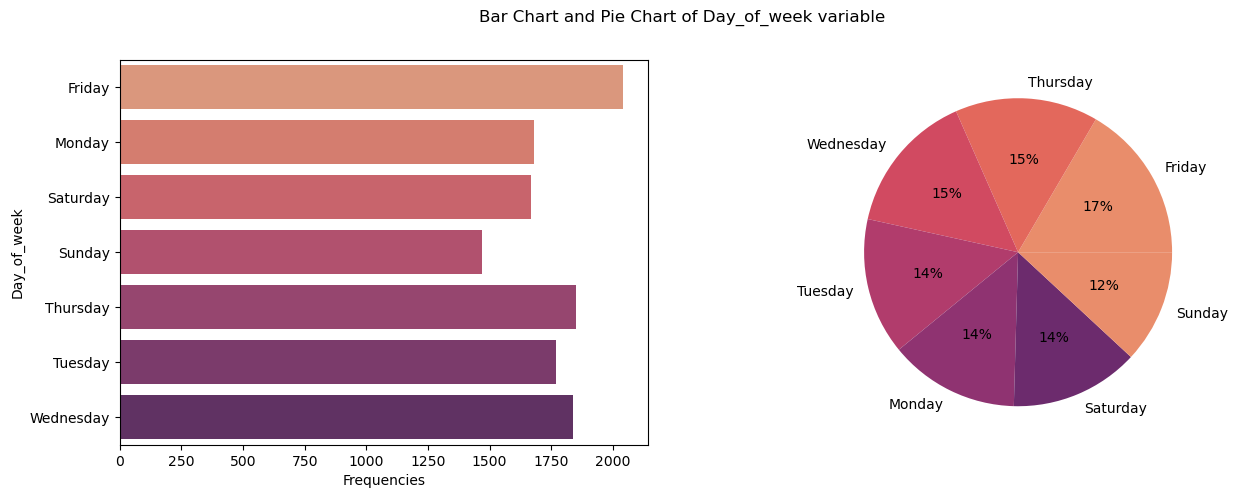

Frequency table of Age_band_of_driver variable: 


,Age_band_of_driver,Frequencies,% Percentages
0,18-30,4271,34.68
1,31-50,4087,33.18
2,Over 51,1585,12.87
3,Unknown,1548,12.57
4,Under 18,825,6.70


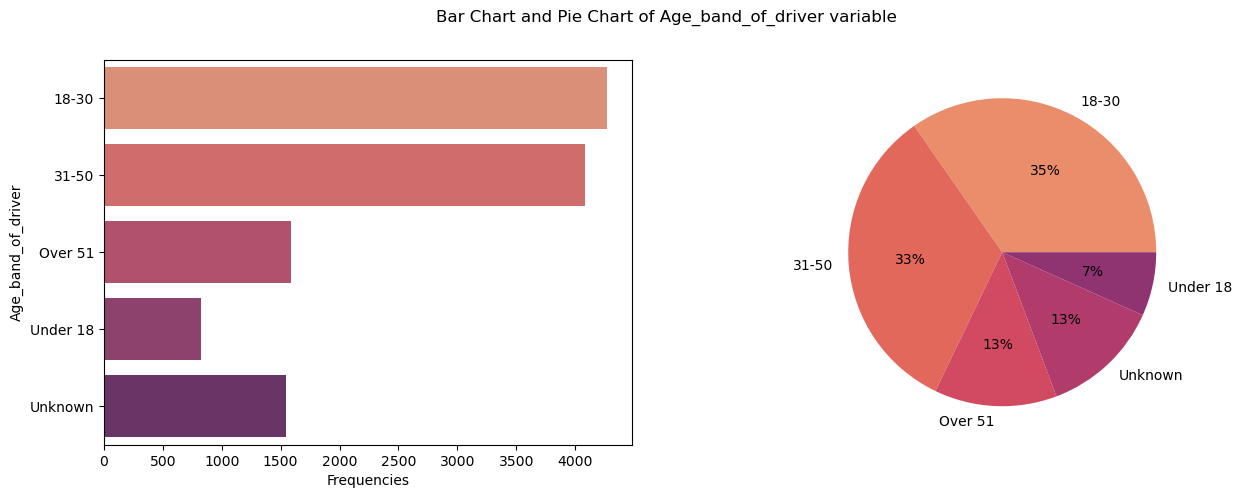

Frequency table of Sex_of_driver variable: 


,Sex_of_driver,Frequencies,% Percentages
0,Male,11437,92.86
1,Female,701,5.69
2,Unknown,178,1.45


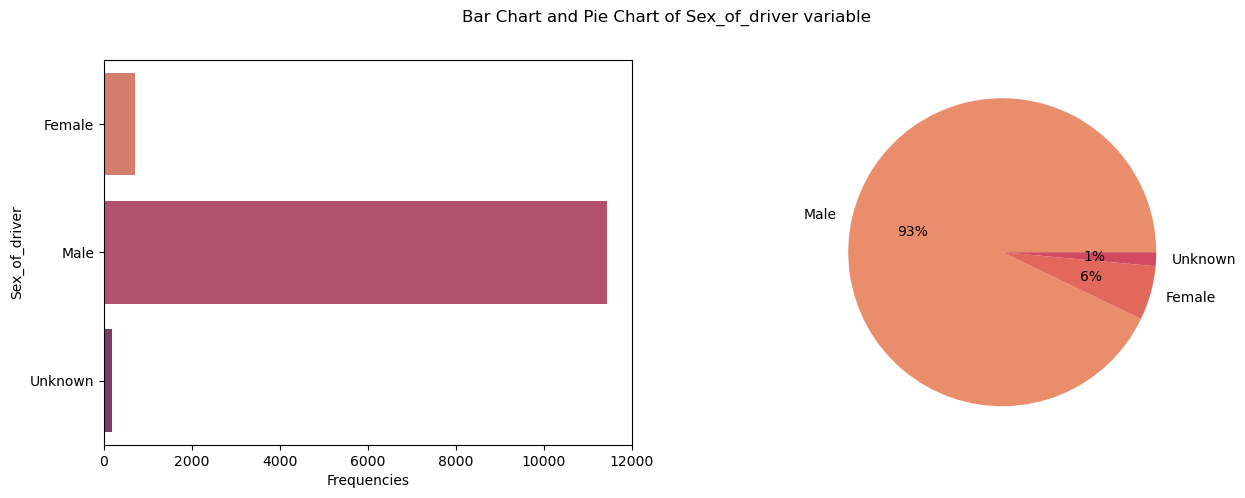

Frequency table of Educational_level variable: 


,Educational_level,Frequencies,% Percentages
0,Junior high school,7619,65.82
1,Elementary school,2163,18.69
2,High school,1110,9.59
3,Above high school,362,3.13
4,Writing & reading,176,1.52
5,Unknown,100,0.86
6,Illiterate,45,0.39


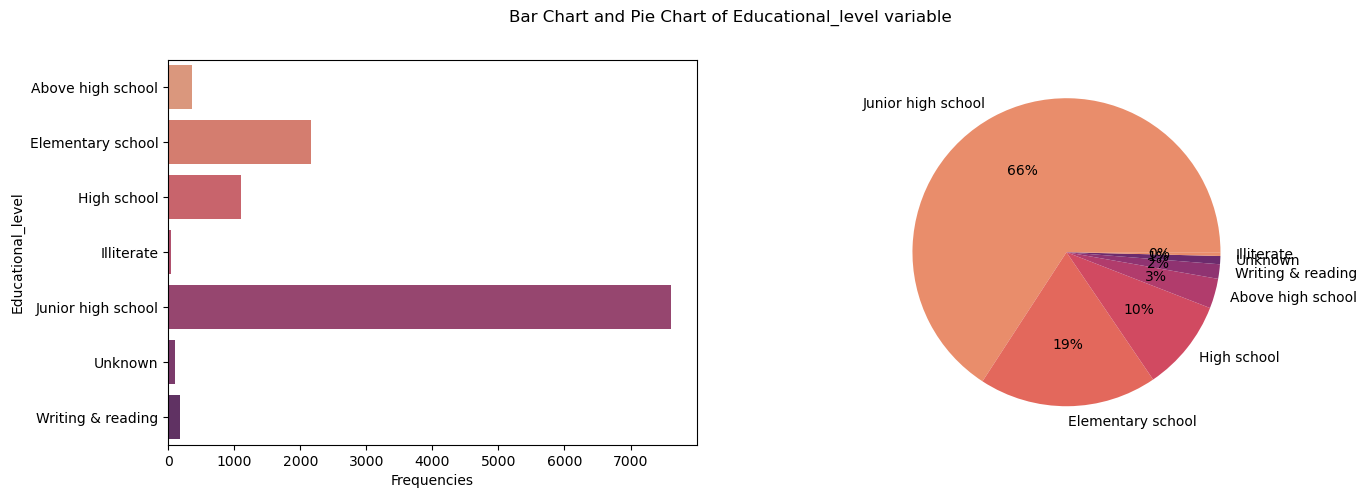

Frequency table of Vehicle_driver_relation variable: 


,Vehicle_driver_relation,Frequencies,% Percentages
0,Employee,9627,82.02
1,Owner,1973,16.81
2,Other,123,1.05
3,Unknown,14,0.12


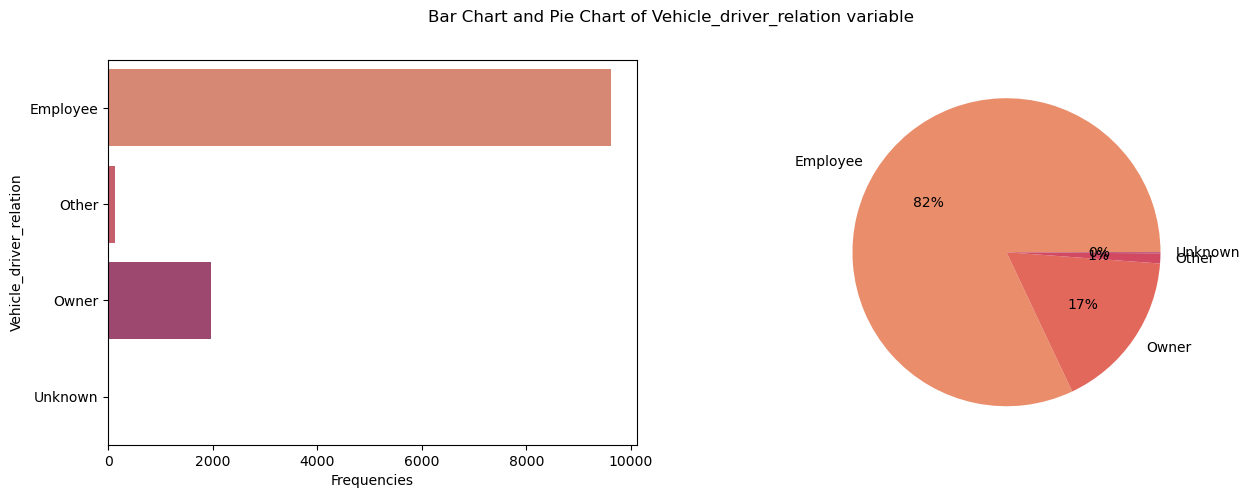

Frequency table of Driving_experience variable: 


,Driving_experience,Frequencies,% Percentages
0,5-10yr,3363,29.28
1,2-5yr,2613,22.75
2,Above 10yr,2262,19.69
3,1-2yr,1756,15.29
4,Below 1yr,1342,11.68
5,No Licence,118,1.03
6,unknown,33,0.29


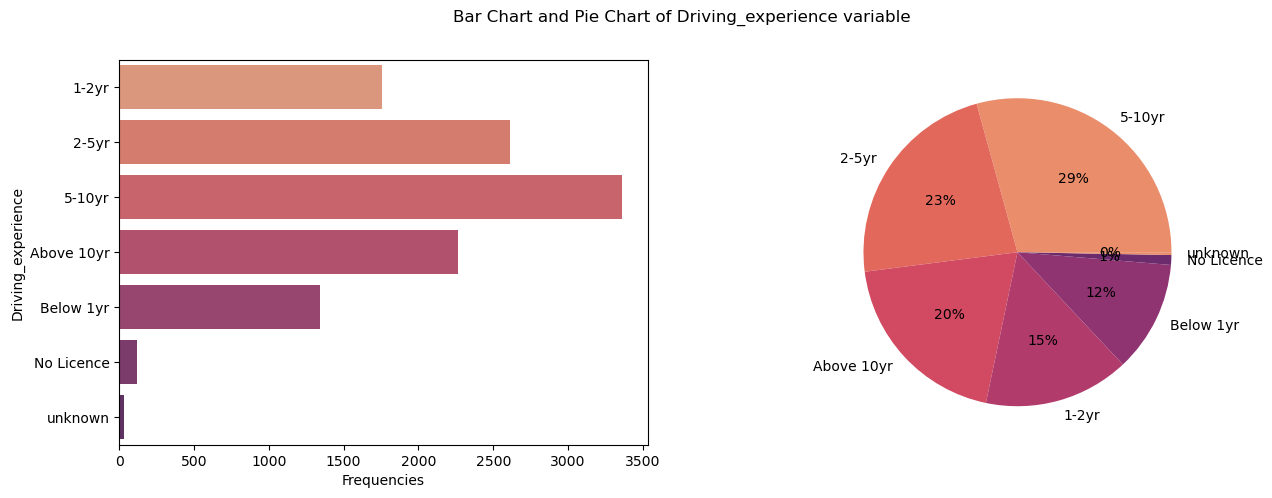

Frequency table of Type_of_vehicle variable: 


,Type_of_vehicle,Frequencies,% Percentages
0,Automobile,3205,28.20
1,Lorry (41?100Q),2186,19.23
2,Other,1208,10.63
3,Pick up upto 10Q,811,7.14
4,Public (12 seats),711,6.26
5,Stationwagen,687,6.04
6,Lorry (11?40Q),541,4.76
7,Public (13?45 seats),532,4.68
8,Public (> 45 seats),404,3.55
9,Long lorry,383,3.37


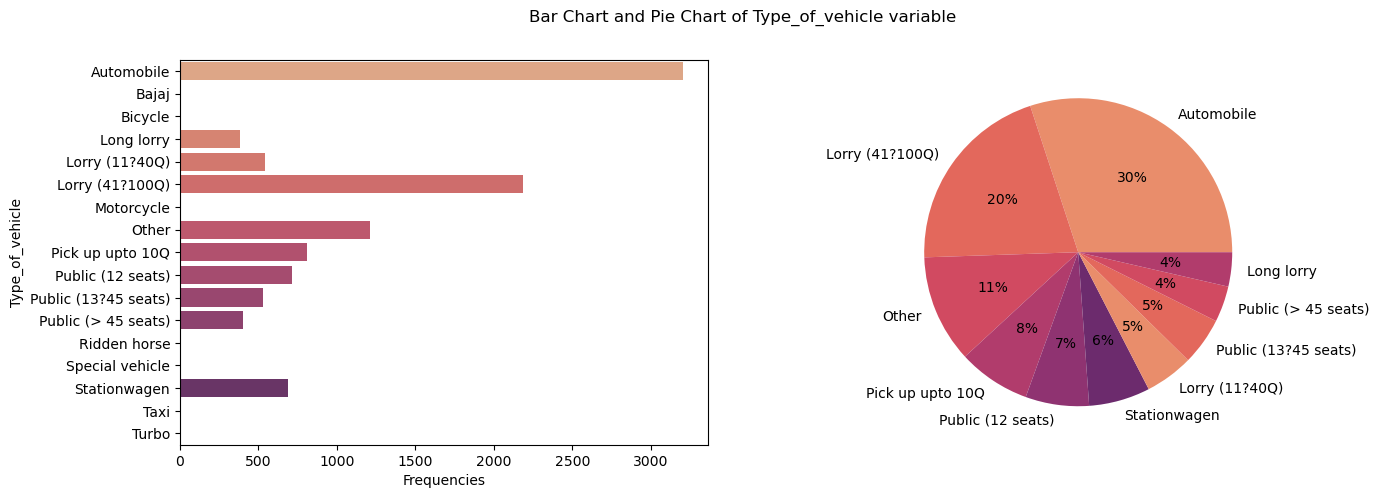

Frequency table of Owner_of_vehicle variable: 


,Owner_of_vehicle,Frequencies,% Percentages
0,Owner,10459,88.38
1,Governmental,1041,8.80
2,Organization,312,2.64
3,Other,22,0.19


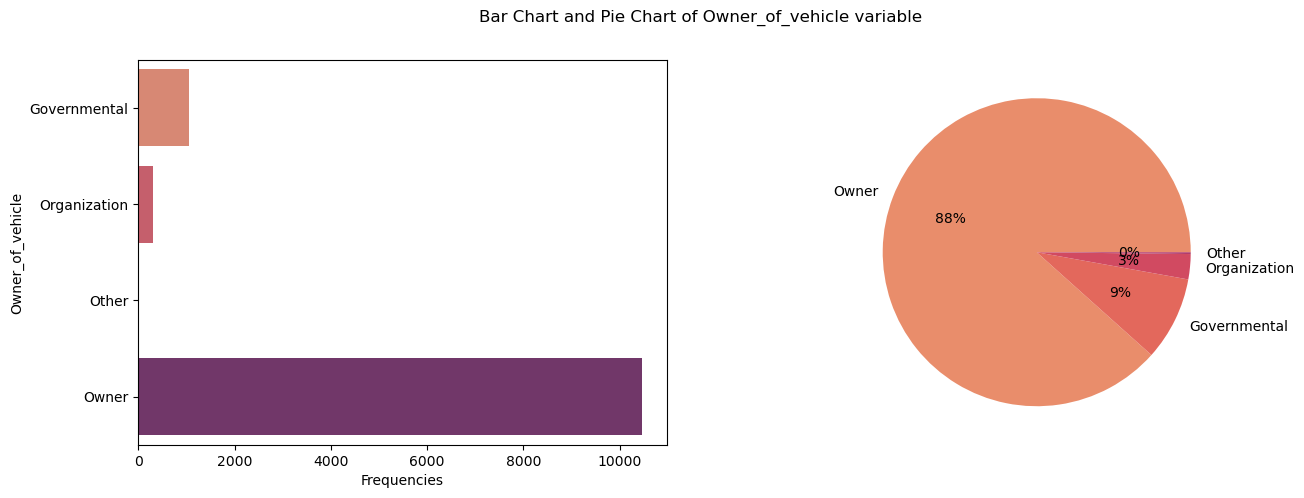

Frequency table of Service_year_of_vehicle variable: 


,Service_year_of_vehicle,Frequencies,% Percentages
0,Unknown,2883,34.37
1,2-5yrs,1792,21.36
2,Above 10yr,1324,15.78
3,5-10yrs,1280,15.26
4,1-2yr,827,9.86
5,Below 1yr,282,3.36


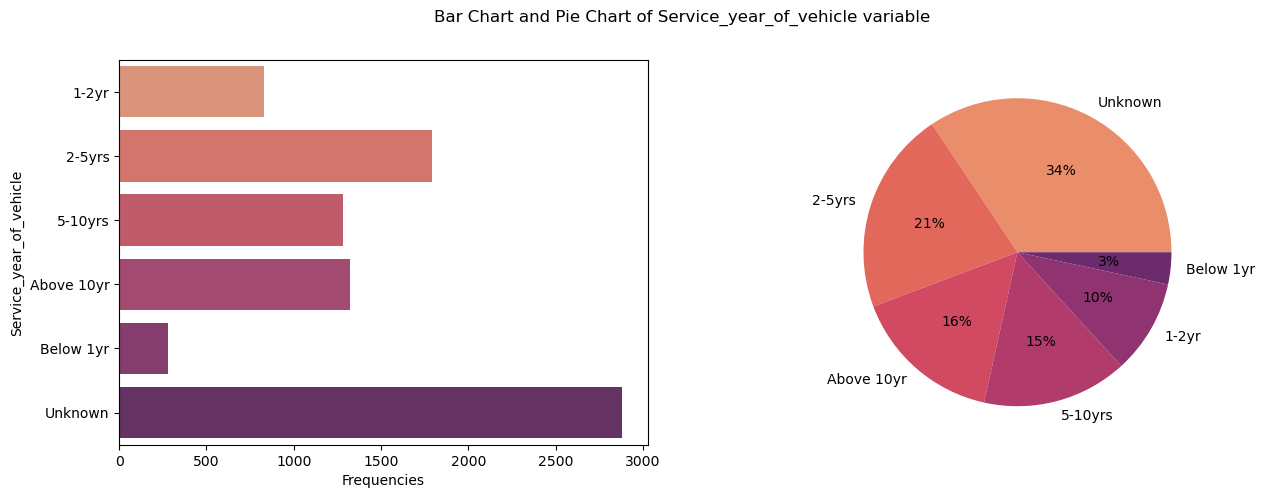

Frequency table of Defect_of_vehicle variable: 


,Defect_of_vehicle,Frequencies,% Percentages
0,No defect,7777,98.58
1,7,76,0.96
2,5,36,0.46


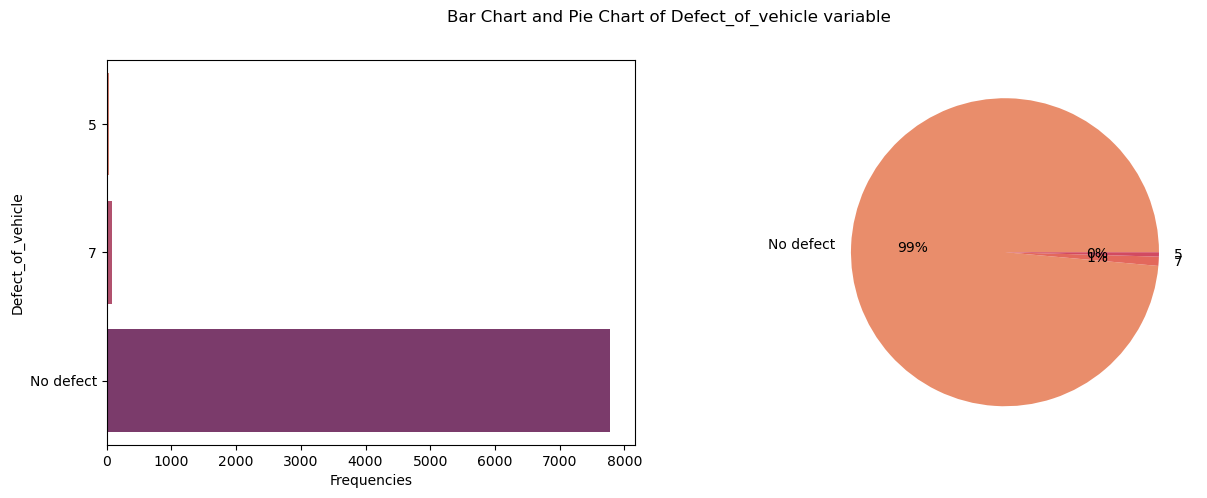

Frequency table of Area_accident_occured variable: 


,Area_accident_occured,Frequencies,% Percentages
0,Other,3819,31.62
1,Office areas,3451,28.57
2,Residential areas,2060,17.06
3,Church areas,1060,8.78
4,Industrial areas,456,3.78
5,School areas,415,3.44
6,Recreational areas,327,2.71
7,Outside rural areas,218,1.81
8,Hospital areas,121,1.00
9,Market areas,63,0.52


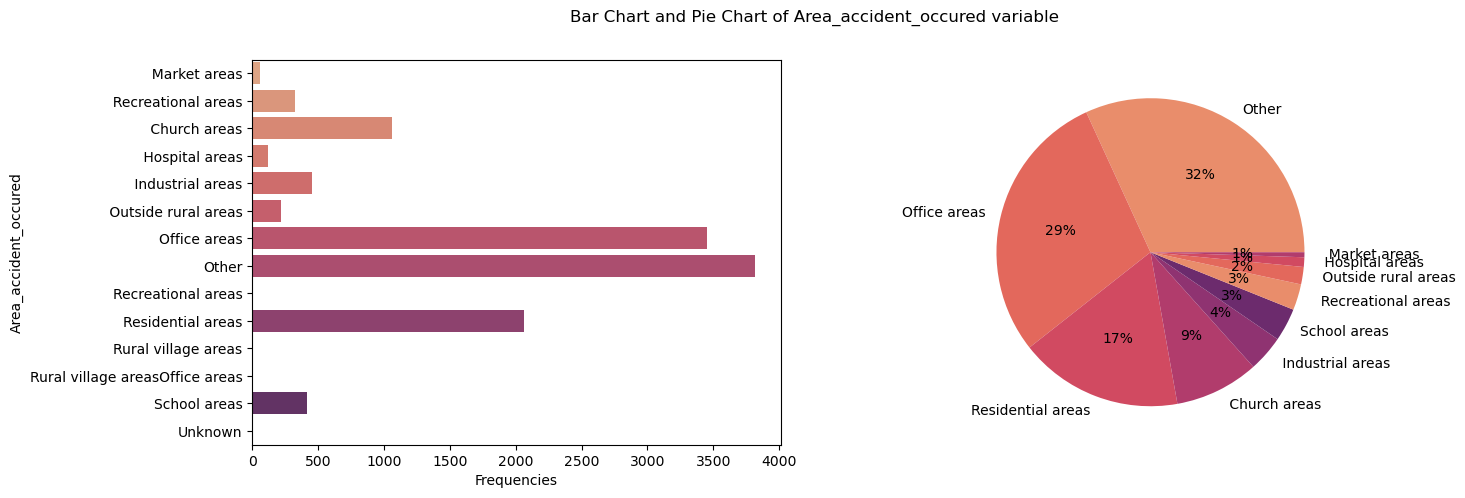

Frequency table of Lanes_or_Medians variable: 


,Lanes_or_Medians,Frequencies,% Percentages
0,Two-way (divided with broken lines road marking),4411,36.97
1,Undivided Two way,3796,31.82
2,other,1660,13.91
3,Double carriageway (median),1020,8.55
4,One way,845,7.08
5,Two-way (divided with solid lines road marking),142,1.19
6,Unknown,57,0.48


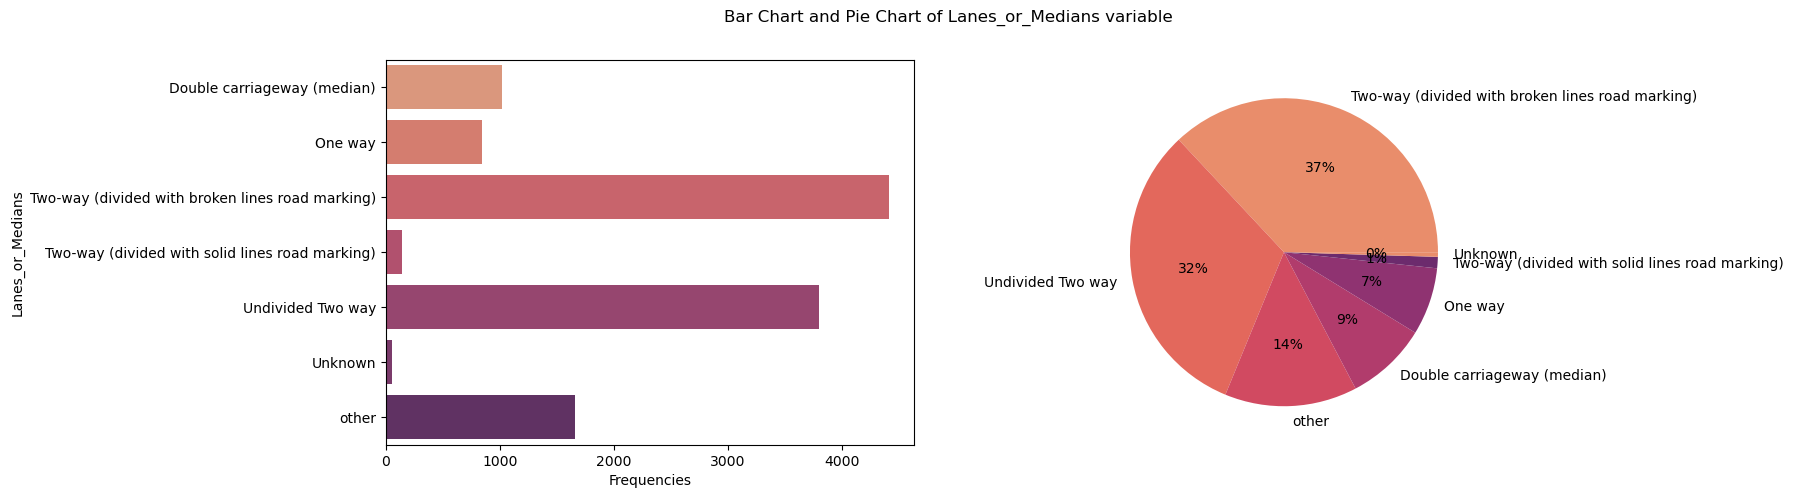

Frequency table of Road_allignment variable: 


,Road_allignment,Frequencies,% Percentages
0,Tangent road with flat terrain,10459,85.91
1,Tangent road with mild grade and flat terrain,501,4.12
2,Steep grade downward with mountainous terrain,429,3.52
3,Tangent road with mountainous terrain and,396,3.25
4,Gentle horizontal curve,163,1.34
5,Escarpments,113,0.93
6,Sharp reverse curve,57,0.47
7,Tangent road with rolling terrain,37,0.30
8,Steep grade upward with mountainous terrain,19,0.16


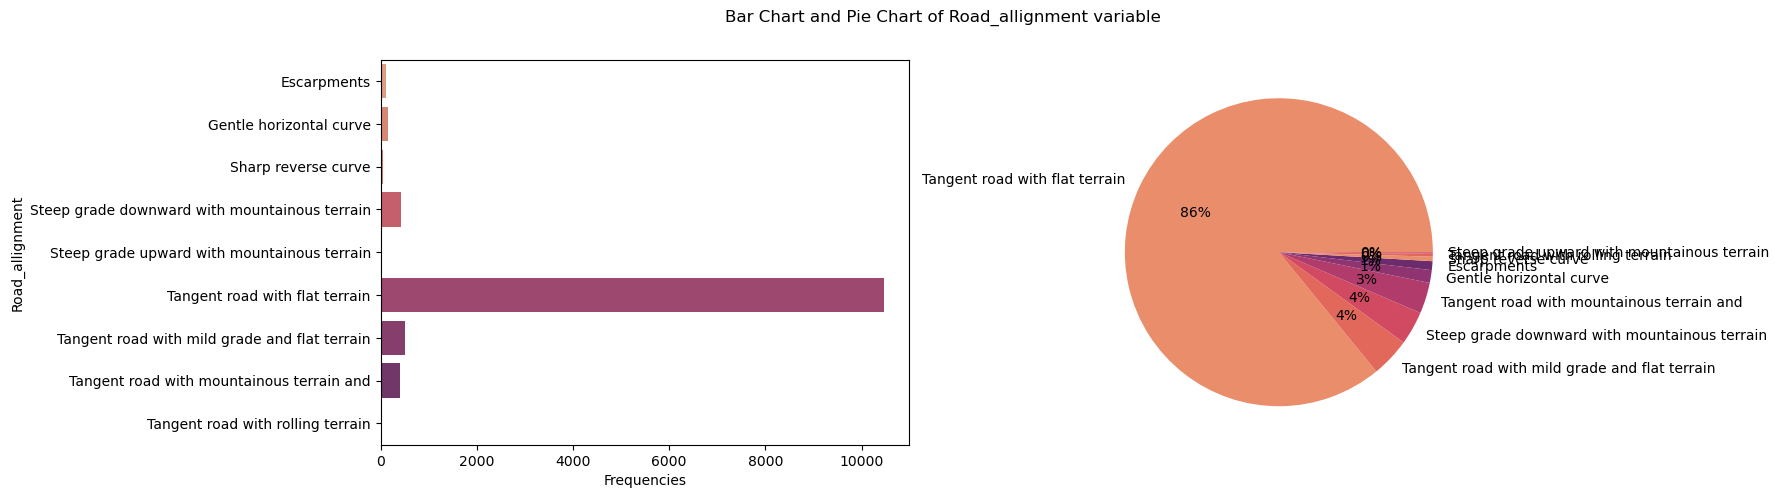

Frequency table of Types_of_Junction variable: 


,Types_of_Junction,Frequencies,% Percentages
0,Y Shape,4543,39.75
1,No junction,3837,33.57
2,Crossing,2177,19.05
3,Other,445,3.89
4,Unknown,191,1.67
5,O Shape,164,1.43
6,T Shape,60,0.52
7,X Shape,12,0.10


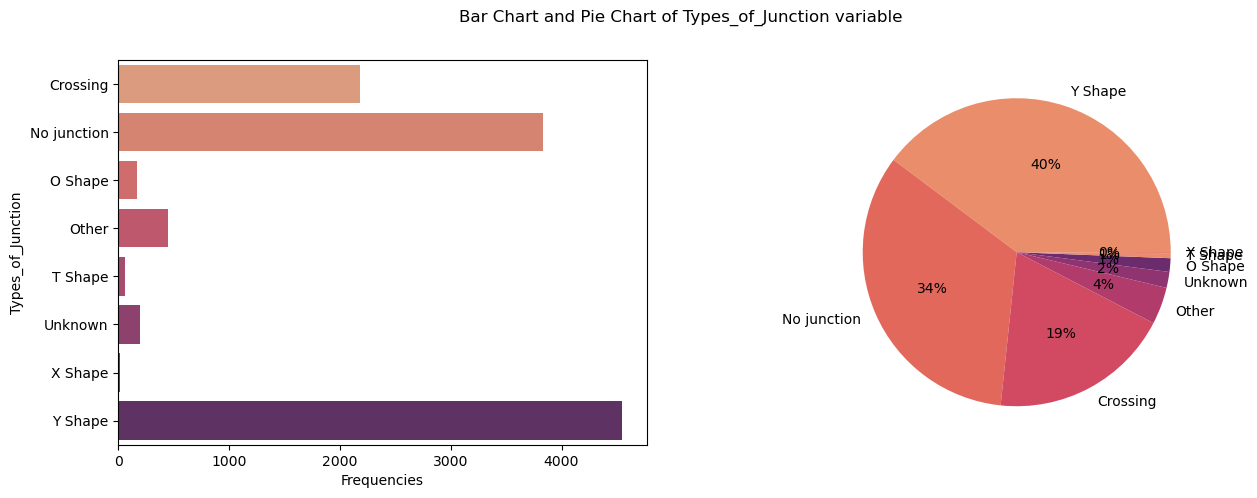

Frequency table of Road_surface_type variable: 


,Road_surface_type,Frequencies,% Percentages
0,Asphalt roads,11296,93.02
1,Earth roads,358,2.95
2,Gravel roads,242,1.99
3,Other,167,1.38
4,Asphalt roads with some distress,81,0.67


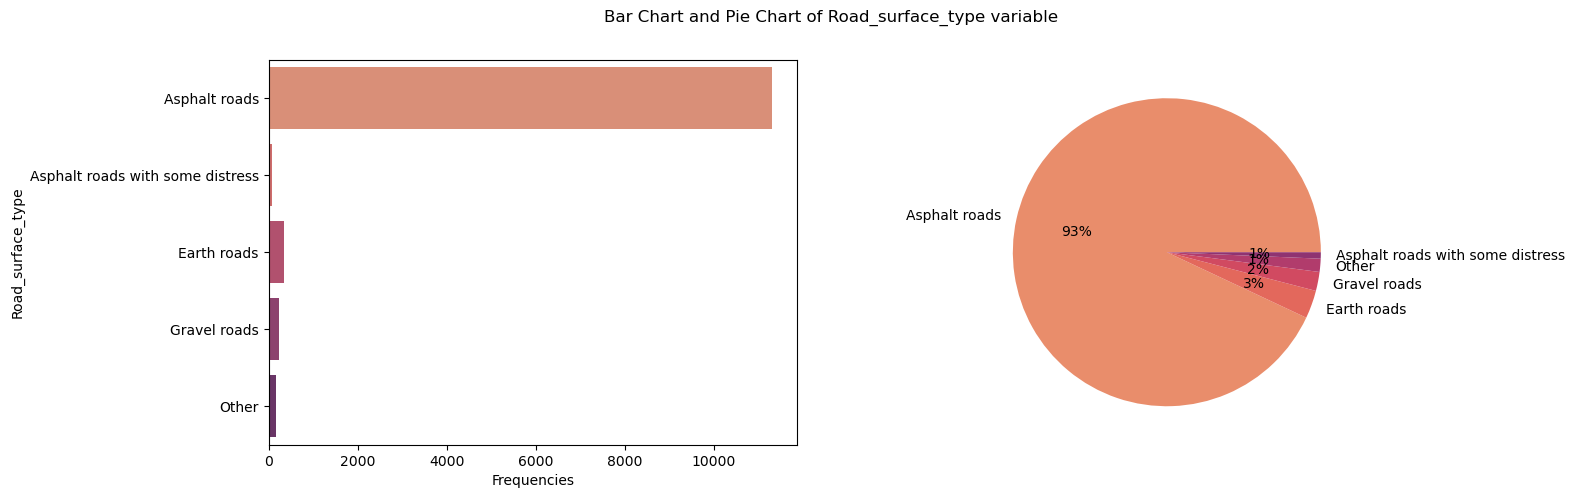

Frequency table of Road_surface_conditions variable: 


,Road_surface_conditions,Frequencies,% Percentages
0,Dry,9340,75.84
1,Wet or damp,2904,23.58
2,Snow,70,0.57
3,Flood over 3cm. deep,2,0.02


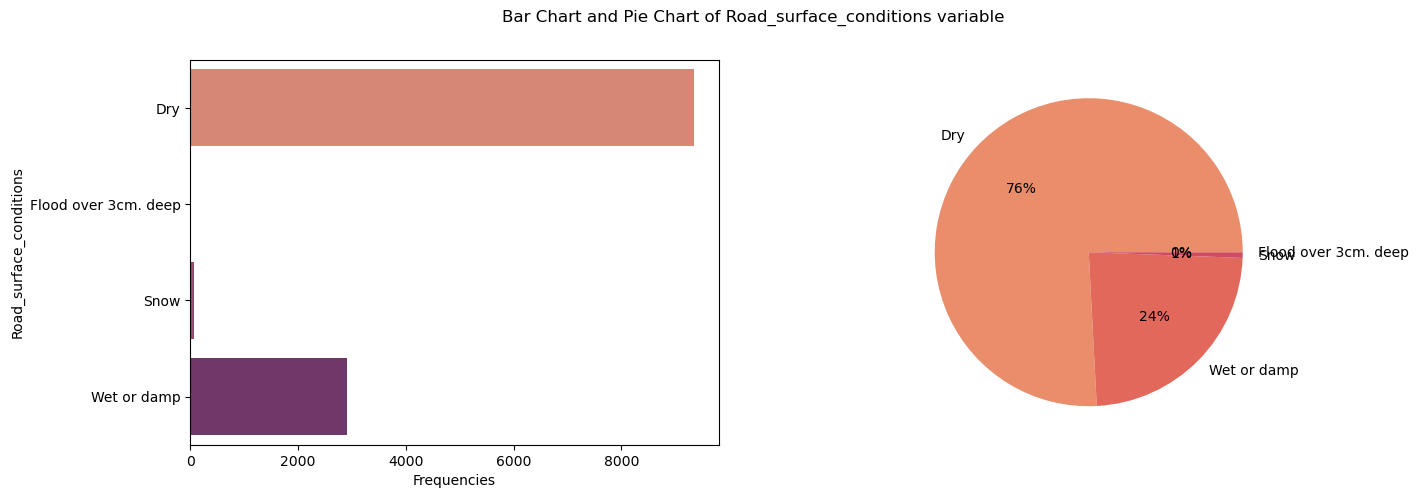

Frequency table of Light_conditions variable: 


,Light_conditions,Frequencies,% Percentages
0,Daylight,8798,71.44
1,Darkness - lights lit,3286,26.68
2,Darkness - no lighting,192,1.56
3,Darkness - lights unlit,40,0.32


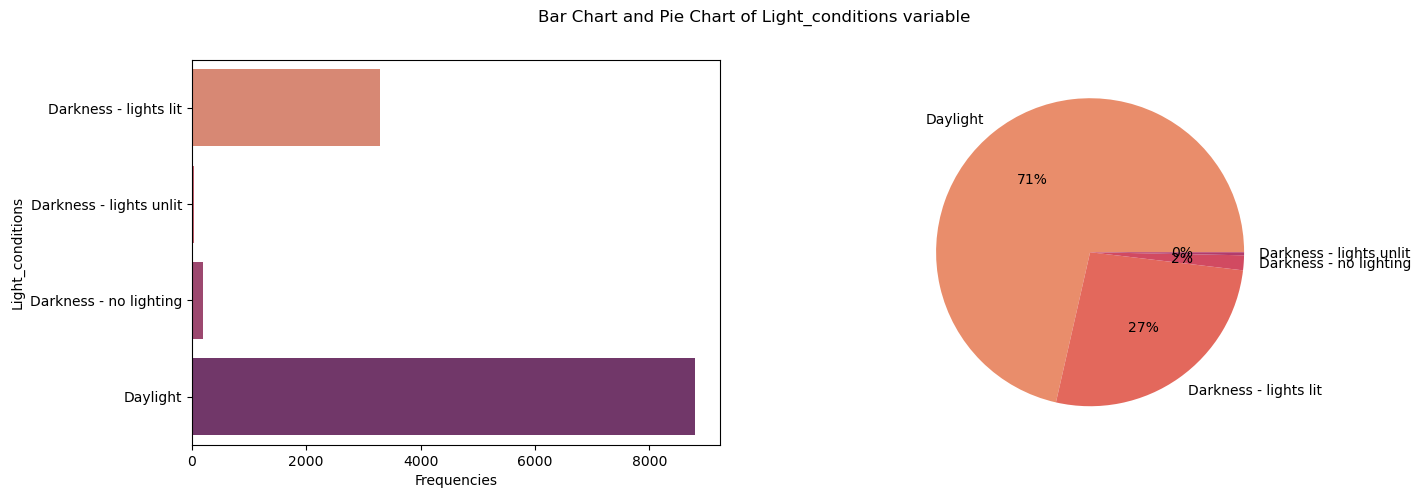

Frequency table of Weather_conditions variable: 


,Weather_conditions,Frequencies,% Percentages
0,Normal,10063,81.71
1,Raining,1331,10.81
2,Other,296,2.40
3,Unknown,292,2.37
4,Cloudy,125,1.01
5,Windy,98,0.80
6,Snow,61,0.50
7,Raining and Windy,40,0.32
8,Fog or mist,10,0.08


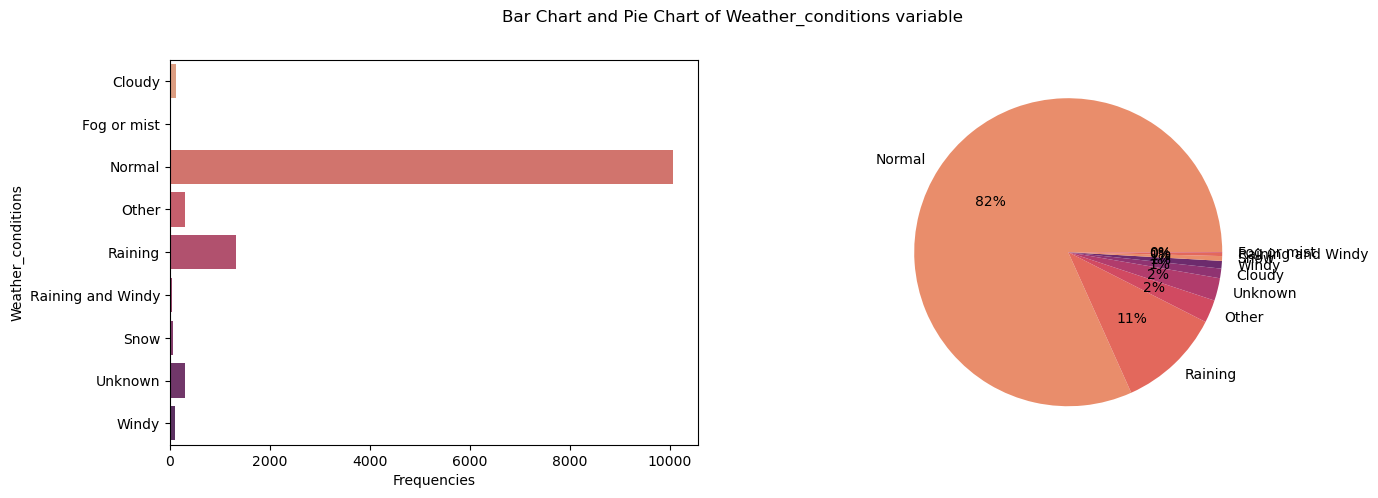

Frequency table of Type_of_collision variable: 


,Type_of_collision,Frequencies,% Percentages
0,Vehicle with vehicle collision,8774,72.15
1,Collision with roadside objects,1786,14.69
2,Collision with pedestrians,896,7.37
3,Rollover,397,3.26
4,Collision with animals,171,1.41
5,Collision with roadside-parked vehicles,54,0.44
6,Fall from vehicles,34,0.28
7,Other,26,0.21
8,Unknown,14,0.12
9,With Train,9,0.07


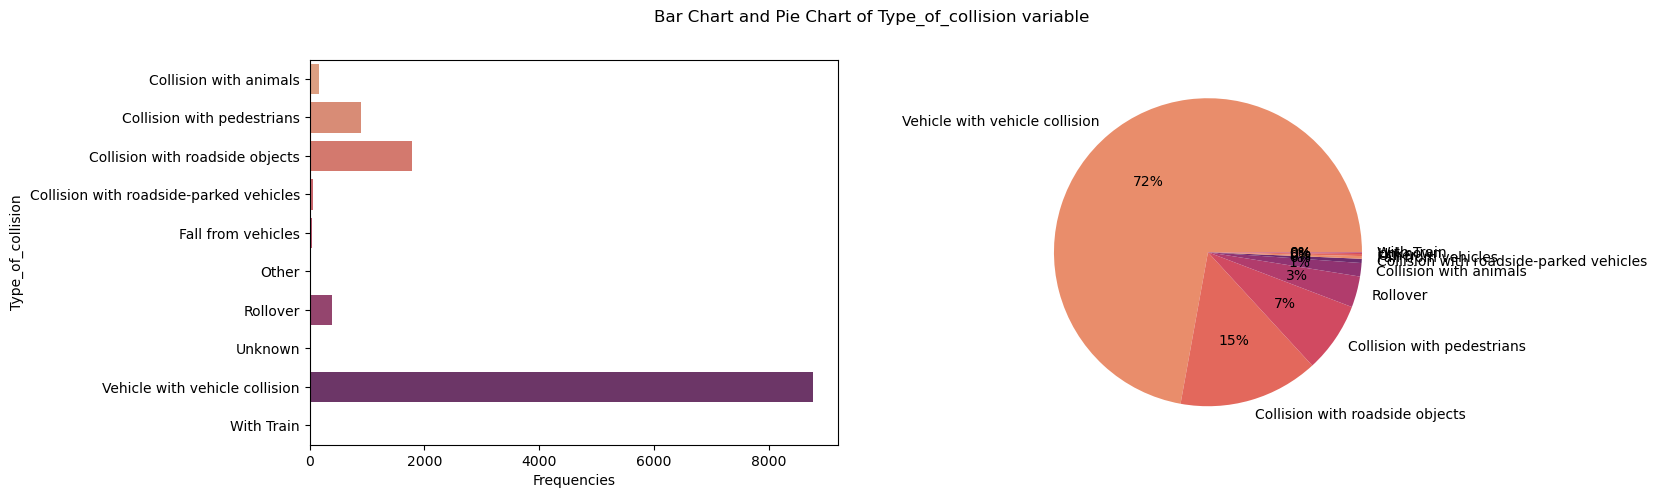

Frequency table of Number_of_vehicles_involved variable: 


,Number_of_vehicles_involved,Frequencies,% Percentages
0,2,8340,67.72
1,1,1996,16.21
2,3,1568,12.73
3,4,363,2.95
4,6,42,0.34
5,7,7,0.06


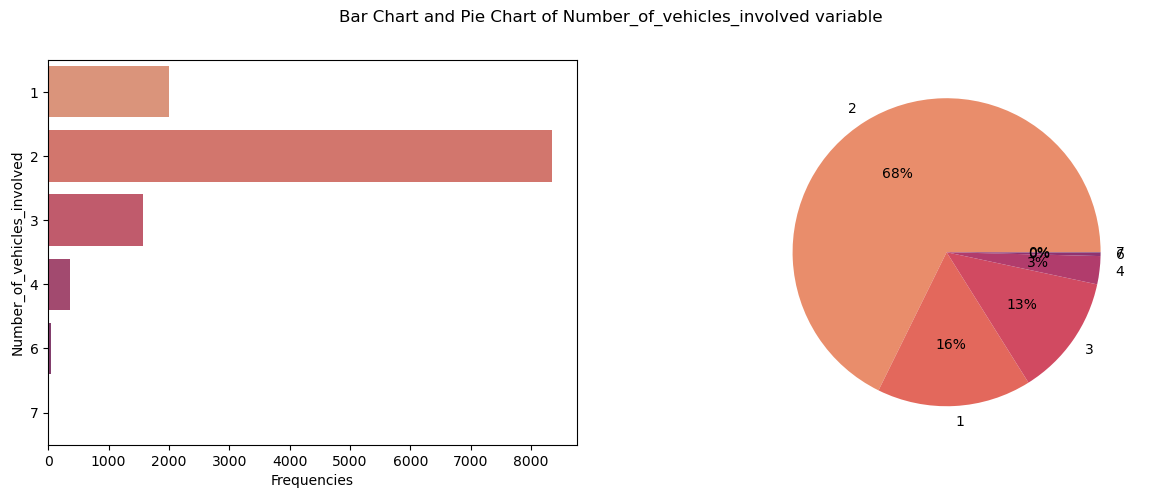

Frequency table of Number_of_casualties variable: 


,Number_of_casualties,Frequencies,% Percentages
0,1,8397,68.18
1,2,2290,18.59
2,3,909,7.38
3,4,394,3.20
4,5,207,1.68
5,6,89,0.72
6,7,22,0.18
7,8,8,0.06


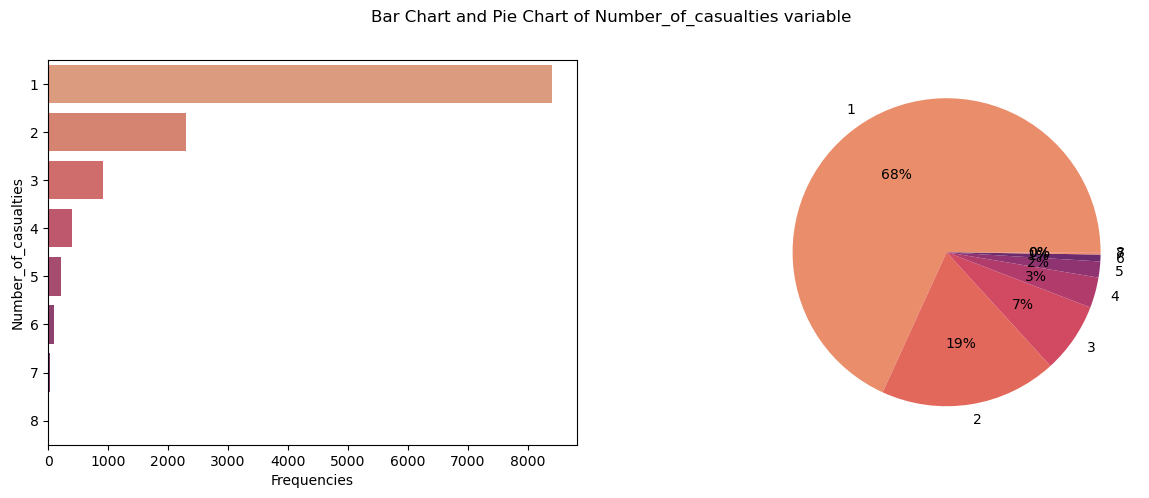

Frequency table of Vehicle_movement variable: 


,Vehicle_movement,Frequencies,% Percentages
0,Going straight,8158,67.94
1,Moving Backward,985,8.20
2,Other,937,7.80
3,Reversing,563,4.69
4,Turnover,489,4.07
5,Getting off,339,2.82
6,Entering a junction,193,1.61
7,Overtaking,96,0.80
8,Unknown,88,0.73
9,Stopping,61,0.51


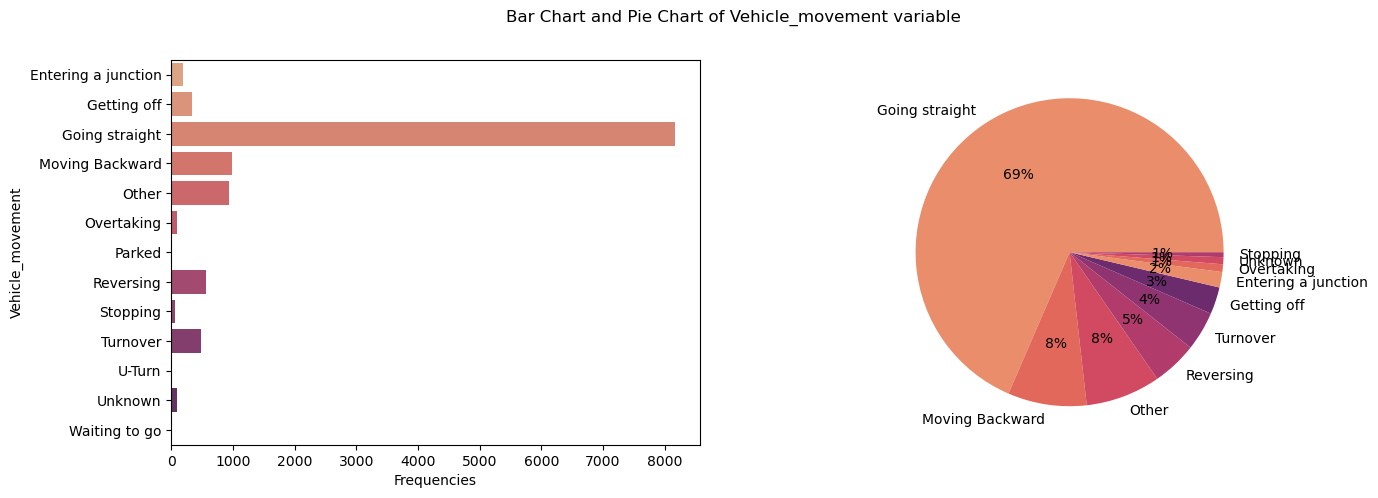

Frequency table of Casualty_class variable: 


,Casualty_class,Frequencies,% Percentages
0,Driver or rider,4944,40.14
1,na,4443,36.08
2,Pedestrian,1649,13.39
3,Passenger,1280,10.39


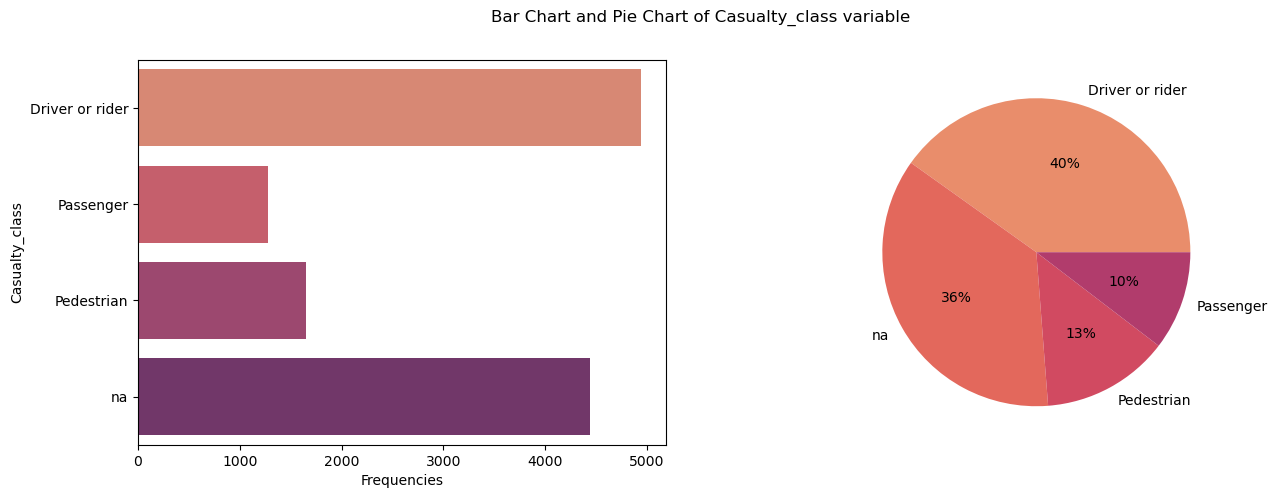

Frequency table of Sex_of_casualty variable: 


,Sex_of_casualty,Frequencies,% Percentages
0,Male,5253,42.65
1,na,4443,36.08
2,Female,2620,21.27


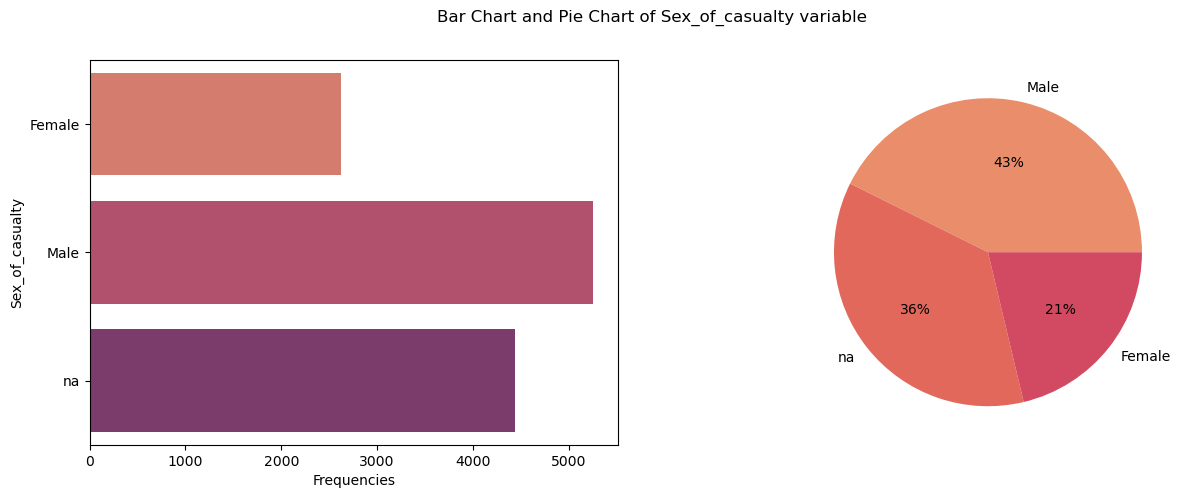

Frequency table of Age_band_of_casualty variable: 


,Age_band_of_casualty,Frequencies,% Percentages
0,na,4443,36.08
1,18-30,3145,25.54
2,31-50,2455,19.93
3,Under 18,1035,8.40
4,Over 51,994,8.07
5,5,244,1.98


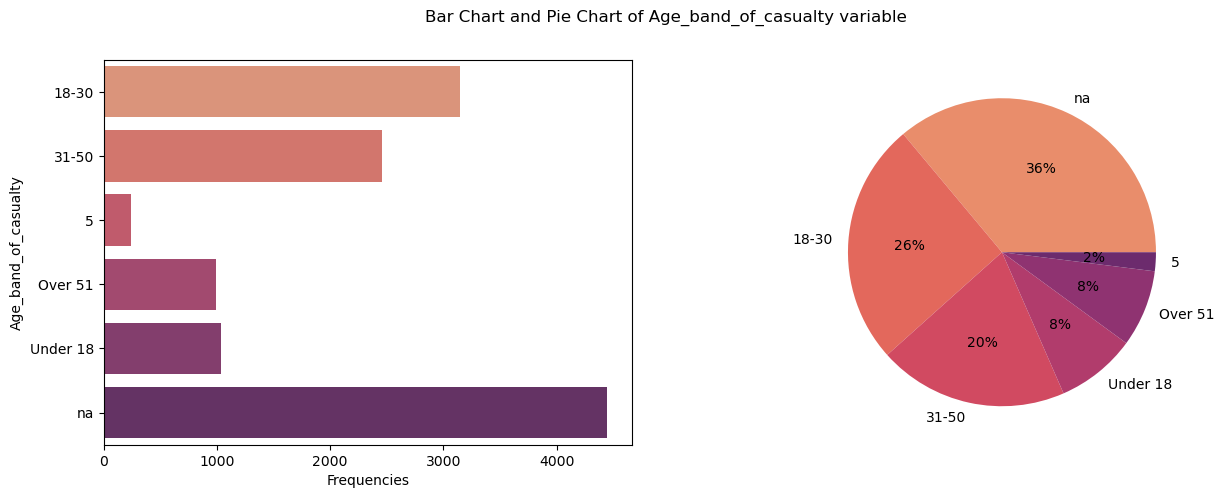

Frequency table of Casualty_severity variable: 


,Casualty_severity,Frequencies,% Percentages
0,3,7076,57.45
1,na,4443,36.08
2,2,771,6.26
3,1,26,0.21


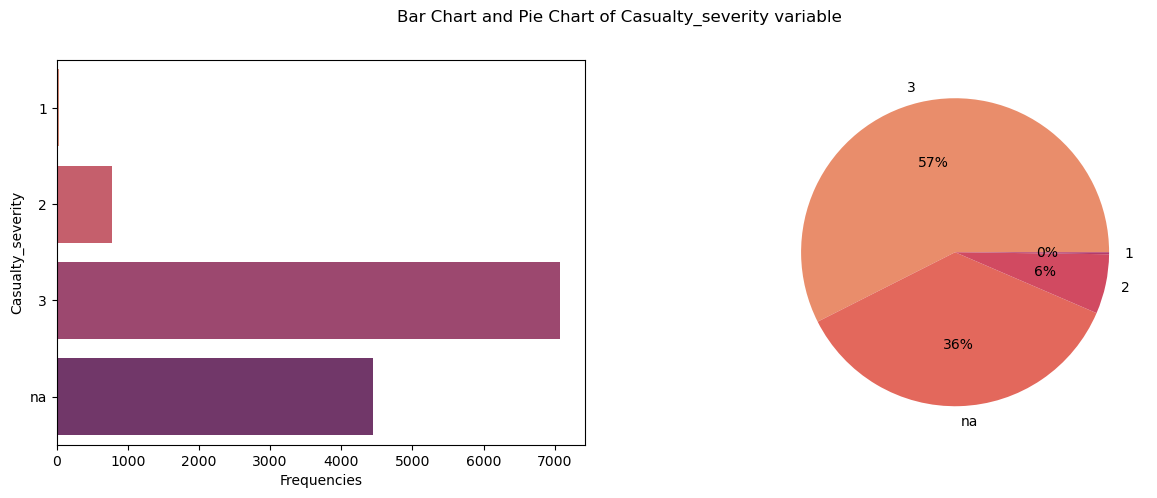

Frequency table of Work_of_casuality variable: 


,Work_of_casuality,Frequencies,% Percentages
0,Driver,5903,64.74
1,Self-employed,2044,22.42
2,Employee,553,6.06
3,Other,463,5.08
4,Student,103,1.13
5,Unemployed,33,0.36
6,Unknown,19,0.21


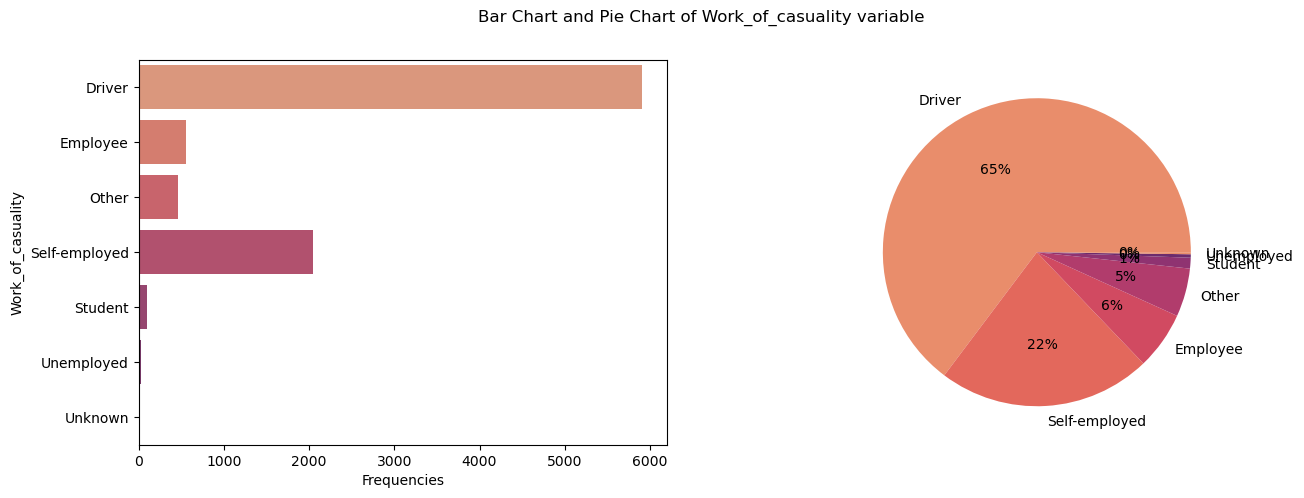

Frequency table of Fitness_of_casuality variable: 


,Fitness_of_casuality,Frequencies,% Percentages
0,Normal,9608,99.25
1,NormalNormal,19,0.20
2,Blind,18,0.19
3,Deaf,18,0.19
4,Other,18,0.19


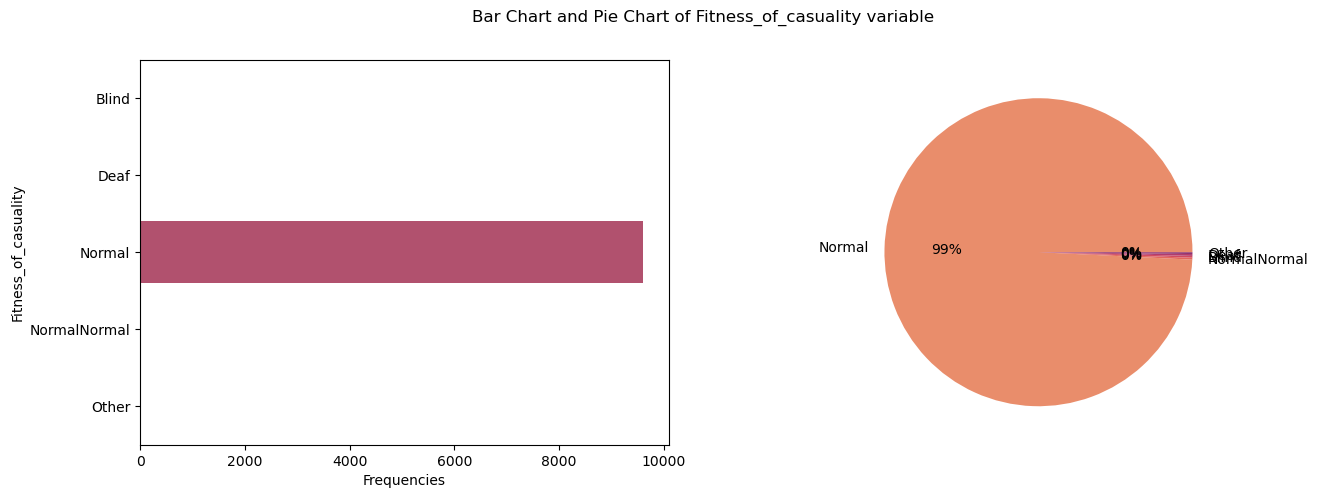

Frequency table of Pedestrian_movement variable: 


,Pedestrian_movement,Frequencies,% Percentages
0,Not a Pedestrian,11390,92.48
1,Crossing from nearside - masked by parked or s...,337,2.74
2,Unknown or other,293,2.38
3,Crossing from driver's nearside,140,1.14
4,Crossing from offside - masked by parked or s...,72,0.58
5,"In carriageway, statioNot a Pedestrianry - not...",46,0.37
6,"Walking along in carriageway, back to traffic",18,0.15
7,"In carriageway, statioNot a Pedestrianry - not...",13,0.11
8,"Walking along in carriageway, facing traffic",7,0.06


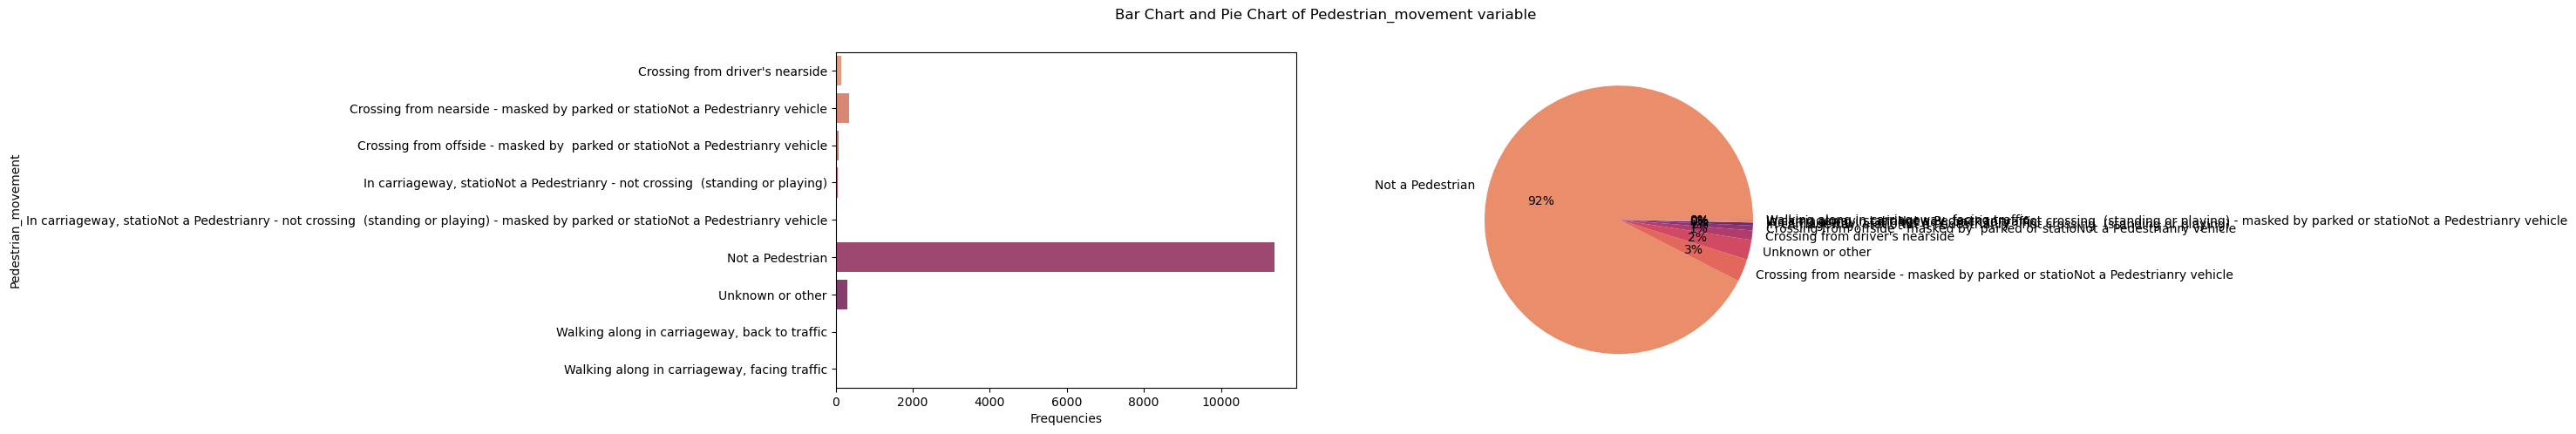

Frequency table of Cause_of_accident variable: 


,Cause_of_accident,Frequencies,% Percentages
0,No distancing,2263,18.37
1,Changing lane to the right,1808,14.68
2,Changing lane to the left,1473,11.96
3,Driving carelessly,1402,11.38
4,No priority to vehicle,1207,9.80
5,Moving Backward,1137,9.23
6,No priority to pedestrian,721,5.85
7,Other,456,3.70
8,Overtaking,430,3.49
9,Driving under the influence of drugs,340,2.76


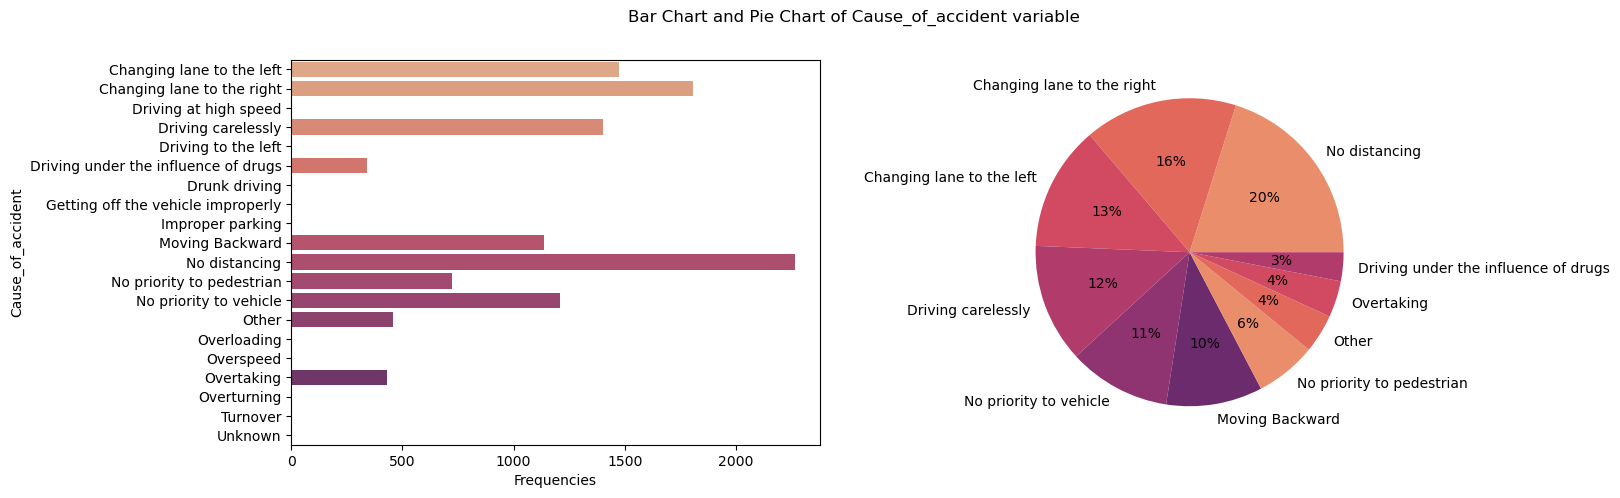

Frequency table of Accident_severity variable: 


,Accident_severity,Frequencies,% Percentages
0,Slight Injury,10415,84.56
1,Serious Injury,1743,14.15
2,Fatal injury,158,1.28


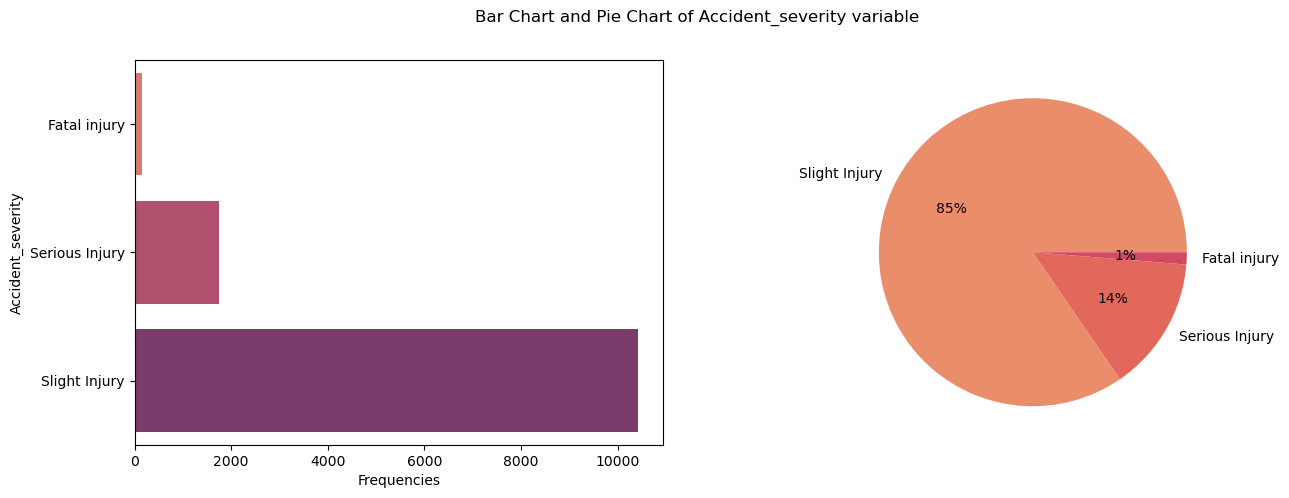

In [19]:
for i in range(1,len(categorical)):
    descriptive_summary_c(categorical[i],df)

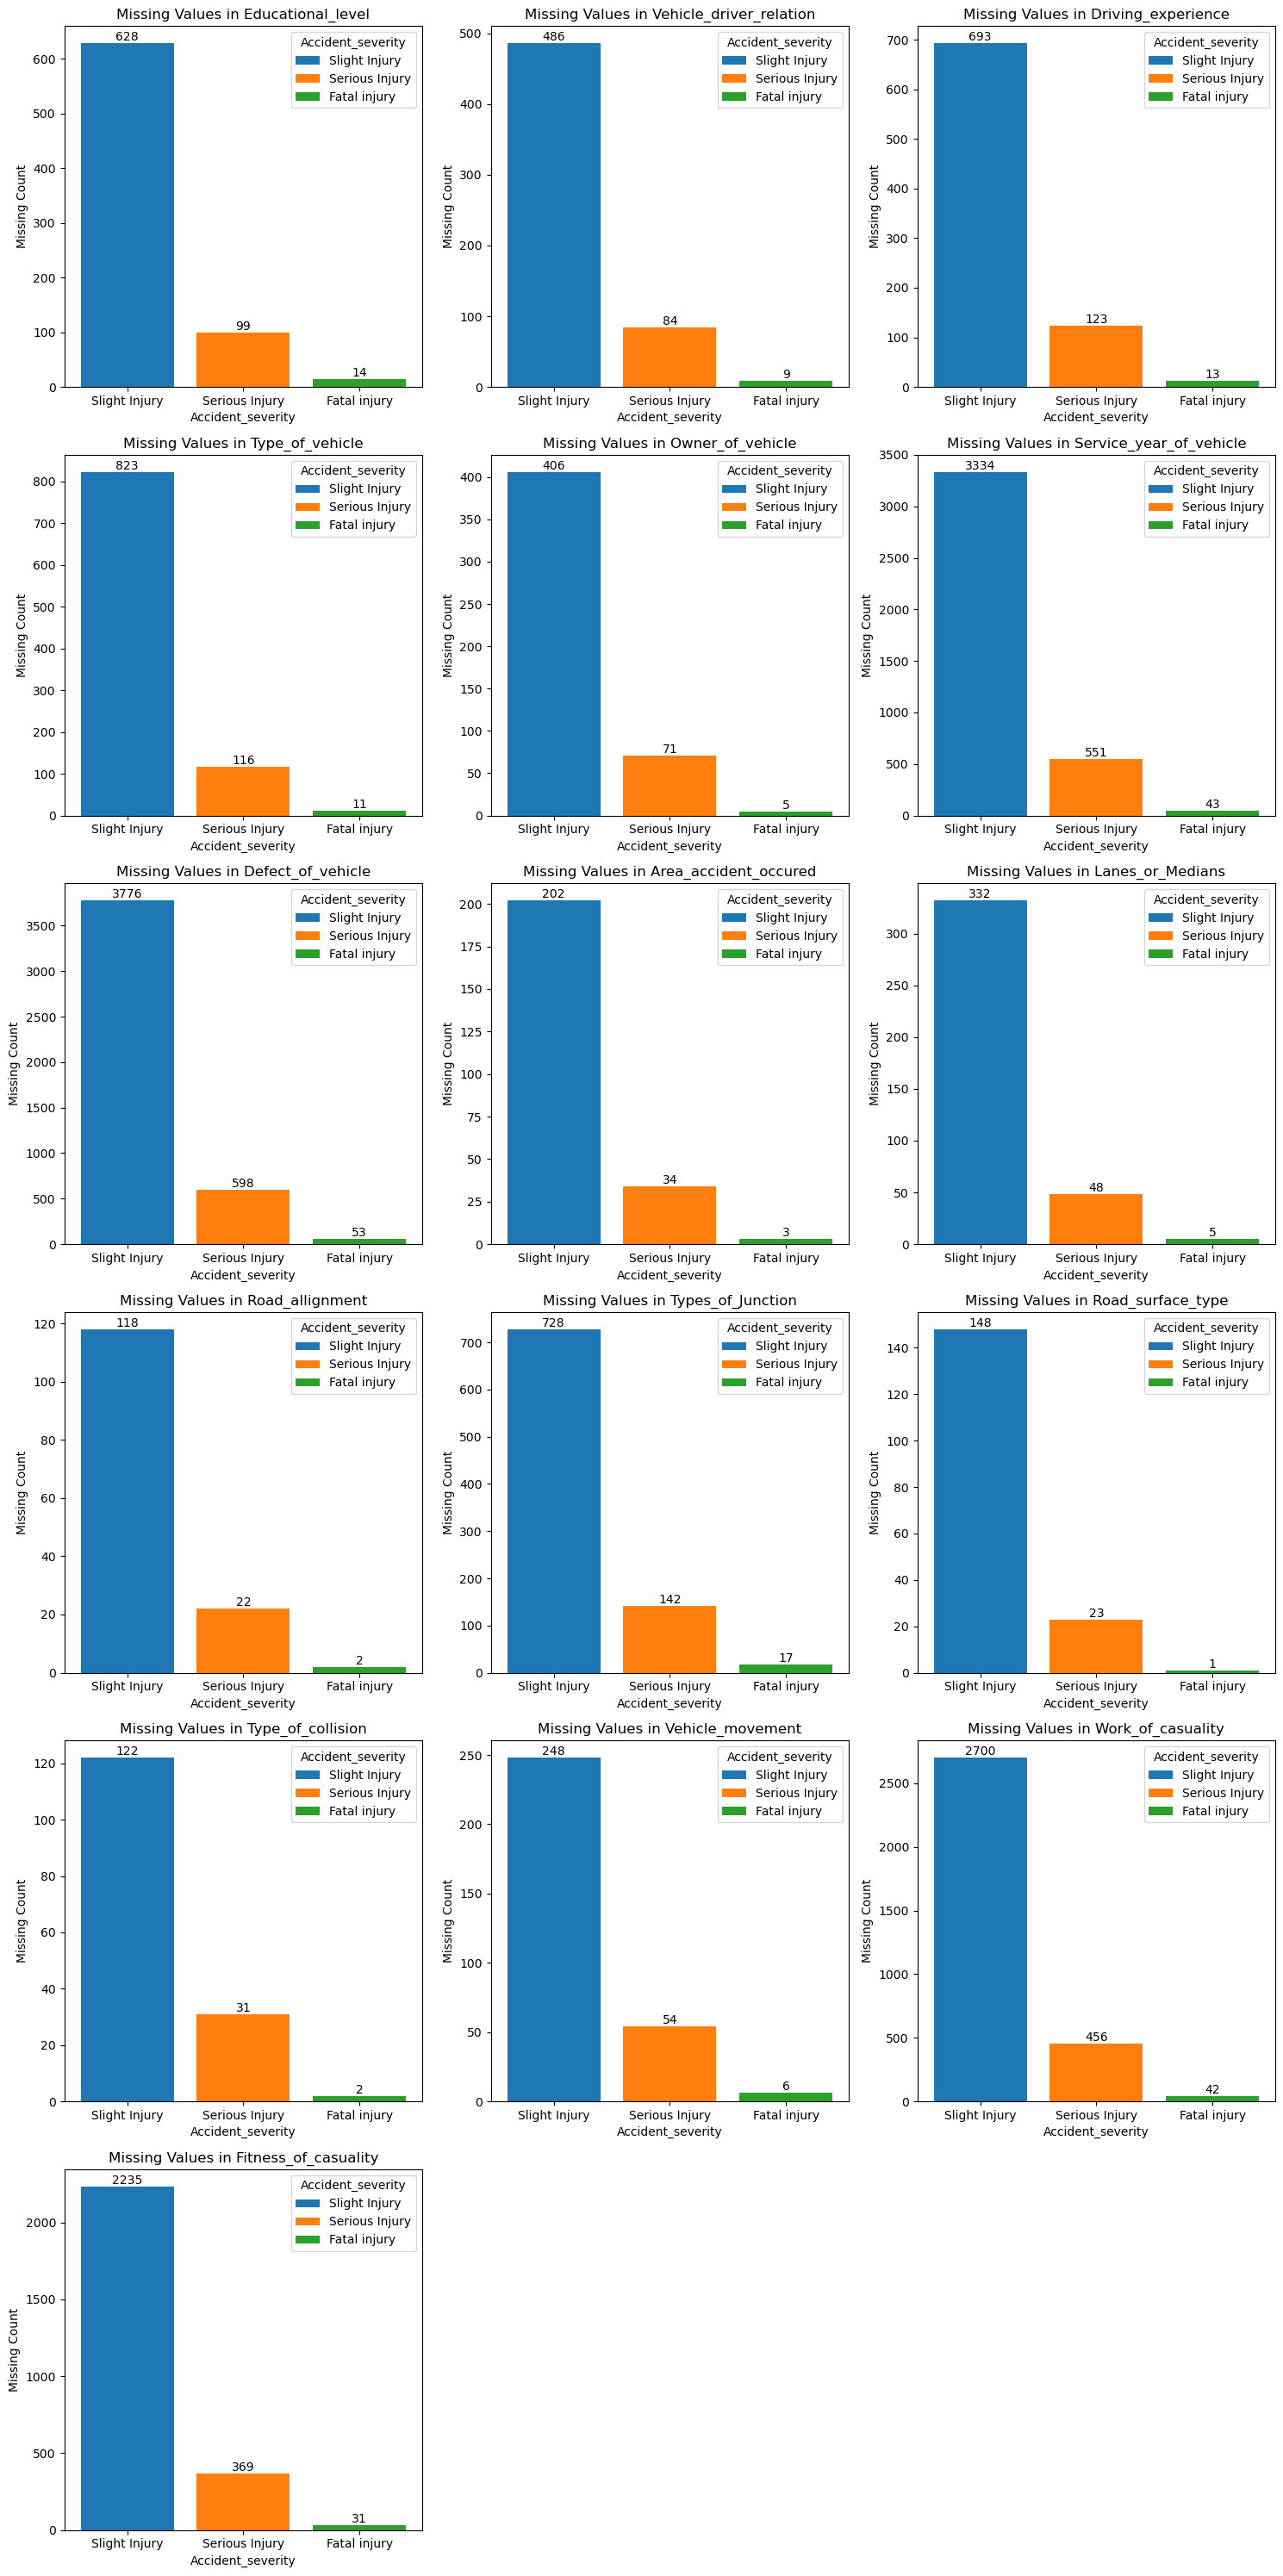

In [17]:
target_column = 'Accident_severity'
target_classes = df[target_column].unique()

# Get the number of columns with missing values
columns_with_missing = [col for col in df.columns if df[col].isnull().any()]
num_columns_with_missing = len(columns_with_missing)

# Set the number of subplots per row (adjust as needed)
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(math.ceil(num_columns_with_missing / subplots_per_row))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate through it
axes = axes.flatten()

# Iterate through each column with missing values
for i, col in enumerate(columns_with_missing):
    ax = axes[i]
    
    # Iterate through each target class
    for target_class in target_classes:
        missing_count = df[(df[target_column] == target_class) & df[col].isnull()].shape[0]
        ax.bar(target_class, missing_count, label=f'{target_class}')
        ax.text(target_class, missing_count, str(missing_count), ha='center', va='bottom')  # Add count labels

    ax.set_xlabel(target_column)
    ax.set_ylabel('Missing Count')
    ax.set_title(f'Missing Values in {col}')
    ax.legend(title=target_column)

# Hide empty subplots if any
for i in range(num_columns_with_missing, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


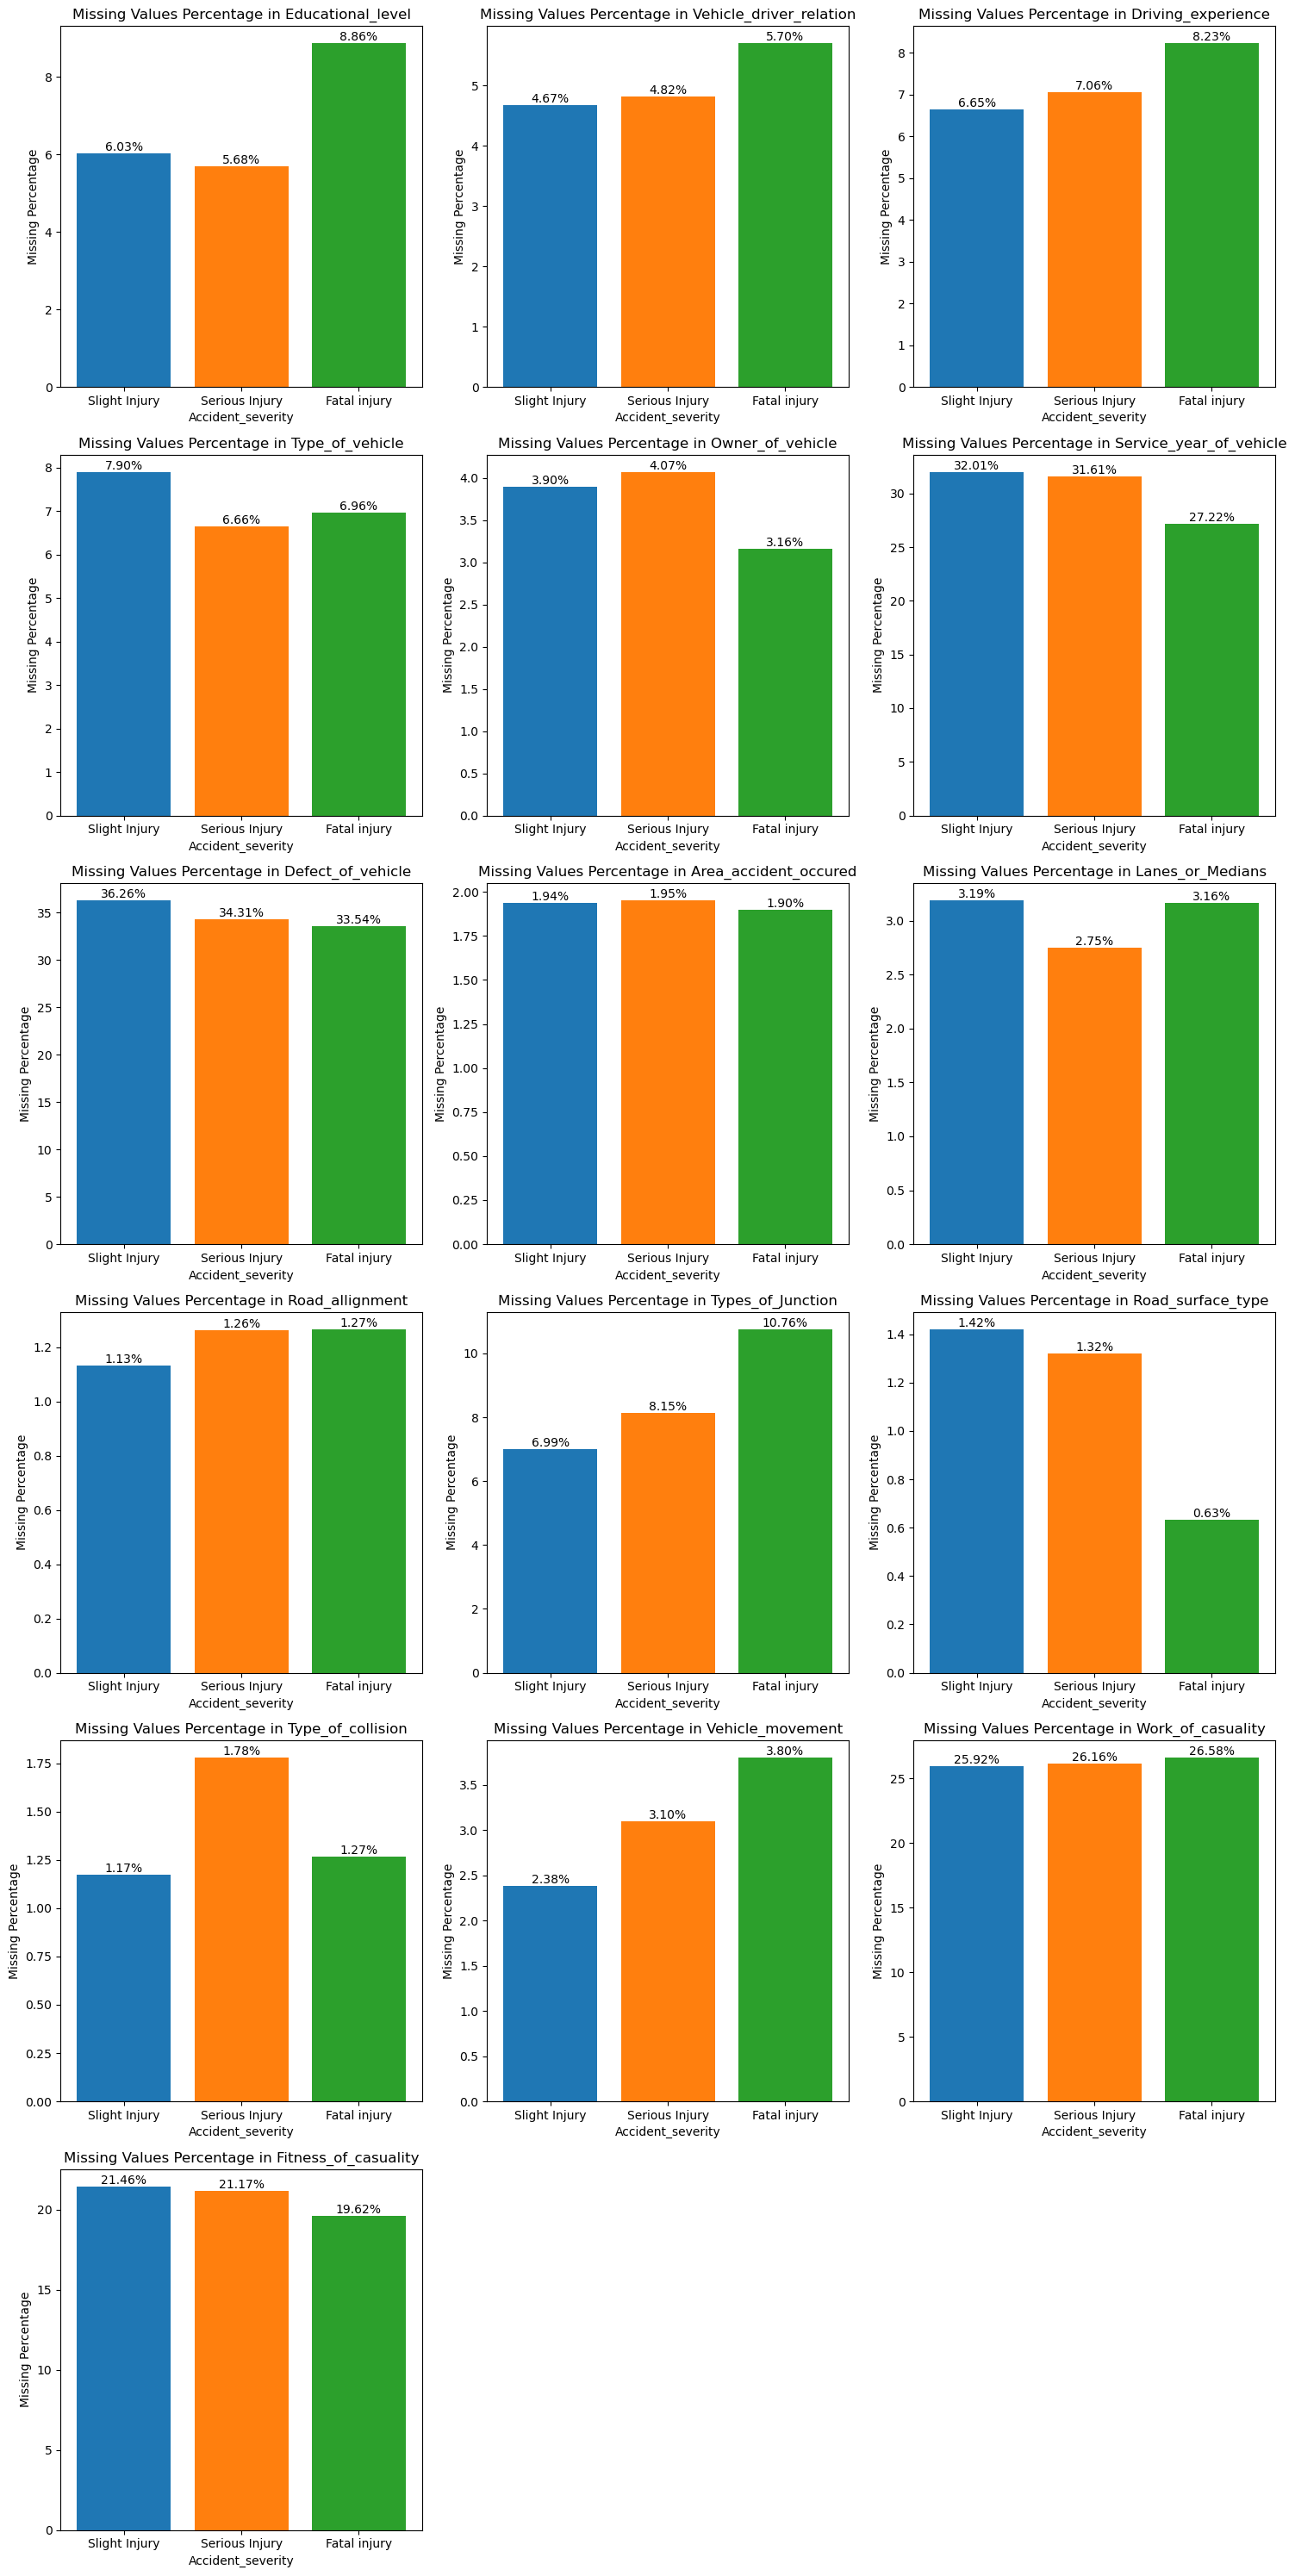

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame, 'target_column' is the column containing target classes,
# and 'target_classes' is a list of your target variable's unique classes
target_column = 'Accident_severity'
target_classes = df[target_column].unique()

# Get the number of columns with missing values
columns_with_missing = [col for col in df.columns if df[col].isnull().any()]
num_columns_with_missing = len(columns_with_missing)

# Set the number of subplots per row (adjust as needed)
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(math.ceil(num_columns_with_missing / subplots_per_row))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate through it
axes = axes.flatten()

# Iterate through each column with missing values
for i, col in enumerate(columns_with_missing):
    ax = axes[i]
    
    # Iterate through each target class
    for j, target_class in enumerate(target_classes):
        subset = df[df[target_column] == target_class]
        total_count = subset.shape[0]
        missing_count = subset[col].isnull().sum()
        missing_percentage = (missing_count / total_count) * 100

        # Calculate the x position for the bar
        x = j + 1
        ax.bar(x, missing_percentage)
        
        # Add the percentage value as label
        ax.text(x, missing_percentage, f'{missing_percentage:.2f}%', ha='center', va='bottom')

    ax.set_xticks(range(1, len(target_classes) + 1))
    ax.set_xticklabels(target_classes)
    ax.set_xlabel(target_column)
    ax.set_ylabel('Missing Percentage')
    ax.set_title(f'Missing Values Percentage in {col}')

# Hide empty subplots if any
for i in range(num_columns_with_missing, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Pre-Processing

## a) Imputation

In [75]:
def null_treatment(df):
    target_column = 'Accident_severity'
    df.drop(columns = ['Defect_of_vehicle', 'Service_year_of_vehicle', 'Work_of_casuality', 
                         'Fitness_of_casuality'], inplace=True)
    missing_data_df = df[df.isnull().any(axis=1)]
    missing_data_df.reset_index(drop=True, inplace=True)
    print("Missing data shape:",missing_data_df.shape)
    columns_with_missing = [col for col in df.columns if df[col].isnull().any()]
    for col in columns_with_missing:
        # Calculate the mode (most frequent category) for each class within the column
        class_modes = df.groupby(target_column)[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        
        # Iterate through each class and impute missing values with the class-specific mode
        for target_class, class_mode in class_modes.items():
            # Select rows where the target_column matches the class
            rows_to_impute = df[target_column] == target_class
            
            # Fill missing values in the selected rows with the class-specific mode
            df.loc[rows_to_impute, col] = df.loc[rows_to_impute, col].fillna(class_mode)
    return df

In [76]:
df = null_treatment(df)

Missing data shape: (3877, 28)


In [77]:
def categorize_time_period(time_str):
    # Convert the time string to a datetime object
    time_obj = pd.to_datetime(time_str, format='%H:%M:%S')
    
    # Extract the hour from the datetime object
    hour = time_obj.hour
    
    # Categorize the hour into time periods
    if 4 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 20:
        return "evening"
    else:
        return "night"

# Apply the categorization function to the 'Time' column
df['Time_Category'] = df['Time'].apply(categorize_time_period)

In [78]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_Category
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,evening
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,evening
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,evening
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,night
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,night


In [79]:
df.drop(columns='Time', inplace=True)

### Saving the imputed dataset to the disc

In [21]:
df.to_csv("../Data/null_cleaned_rta.csv")

## b)Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
import joblib

In [81]:
def encoding(df):
    df_columns = df.columns.tolist()
    ordinal_encoding_columns = ['Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Light_conditions', 'Age_band_of_casualty', 'Casualty_severity','Time_Category']
    ordinal_order = {'Day_of_week': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], 'Age_band_of_driver': ['Unknown', 'Under 18', '18-30', '31-50', 'Over 51'],
                     'Educational_level': ['Unknown', 'Illiterate', 'Writing & reading', 'Elementary school', 'Junior high school','High school','Above high school'], 
                     'Driving_experience': ['unknown', 'No Licence', 'Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr'], 
                     'Light_conditions': ['Darkness - no lighting', 'Darkness - lights unlit', 'Darkness - lights lit', 'Daylight'],
                     'Age_band_of_casualty': ['na', '5', 'Under 18', '18-30', '31-50', 'Over 51'], 'Casualty_severity': ['na', '1', '2', '3'],'Time_Category': ['morning', 'afternoon', 'evening', 'night']}
    
    label_encoding_columns = [col for col in df_columns if col not in ordinal_encoding_columns]
    # Initialize dictionaries to store encoders
    label_encoders = {}
    ordinal_encoders = {}

    for column in label_encoding_columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[column])
        label_encoders[column] = label_encoder
        df[column] = label_encoder.transform(df[column])
        #joblib.dump(label_encoder, f"label_encoder_{column}.joblib")
    for column in ordinal_encoding_columns:
        ordinal_encoder = OrdinalEncoder()
        ordinal_encoder.fit(df[column].values.reshape(-1, 1))  # Reshape for ordinal encoder
        ordinal_encoders[column] = ordinal_encoder
        df[column] = ordinal_encoder.transform(df[column].values.reshape(-1, 1))
        #joblib.dump(ordinal_encoder, f"ordinal_encoder_{column}.joblib")
    joblib.dump(label_encoders, f"../Encoder/label_encoder.joblib")
    joblib.dump(ordinal_encoders, f"../Encoder/ordinal_encoder.joblib")
    return df, label_encoders, ordinal_encoders

In [82]:
df, label_encoders, ordinal_encoders = encoding(df)

In [84]:
df.describe()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_Category
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.980513,1.292952,0.957535,3.208347,0.333793,1.942676,5.100357,2.693975,6.439591,2.947548,4.930091,3.627395,0.177899,0.718902,2.177493,2.414907,6.405408,1.036700,0.548149,2.864566,1.453962,1.148019,2.620981,2.293927,4.836067,6.916044,1.832819,1.304807
std,2.059712,1.337520,0.263767,1.361538,0.741375,1.236524,4.548810,0.877637,2.349455,1.716536,0.902867,3.093680,0.696446,1.276059,1.324187,1.146012,2.726791,0.667645,1.007179,2.057282,1.331309,0.742709,2.121114,0.587734,0.893611,5.101751,0.406082,1.090756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.000000,6.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,6.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,2.000000,0.000000
50%,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,5.000000,3.000000,7.000000,2.000000,5.000000,2.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,2.000000,5.000000,9.000000,2.000000,1.000000
75%,5.000000,2.000000,1.000000,4.000000,0.000000,3.000000,8.000000,3.000000,7.000000,4.000000,5.000000,7.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,1.000000,3.000000,3.000000,2.000000,5.000000,3.000000,5.000000,11.000000,2.000000,2.000000
max,6.000000,4.000000,2.000000,6.000000,3.000000,6.000000,16.000000,3.000000,13.000000,6.000000,8.000000,7.000000,4.000000,3.000000,3.000000,8.000000,9.000000,5.000000,7.000000,12.000000,3.000000,2.000000,5.000000,3.000000,8.000000,19.000000,2.000000,3.000000


In [85]:
df.dtypes

Day_of_week                    float64
Age_band_of_driver             float64
Sex_of_driver                    int32
Educational_level              float64
Vehicle_driver_relation          int32
Driving_experience             float64
Type_of_vehicle                  int32
Owner_of_vehicle                 int32
Area_accident_occured            int32
Lanes_or_Medians                 int32
Road_allignment                  int32
Types_of_Junction                int32
Road_surface_type                int32
Road_surface_conditions          int32
Light_conditions               float64
Weather_conditions               int32
Type_of_collision                int32
Number_of_vehicles_involved      int64
Number_of_casualties             int64
Vehicle_movement                 int32
Casualty_class                   int32
Sex_of_casualty                  int32
Age_band_of_casualty           float64
Casualty_severity              float64
Pedestrian_movement              int32
Cause_of_accident        

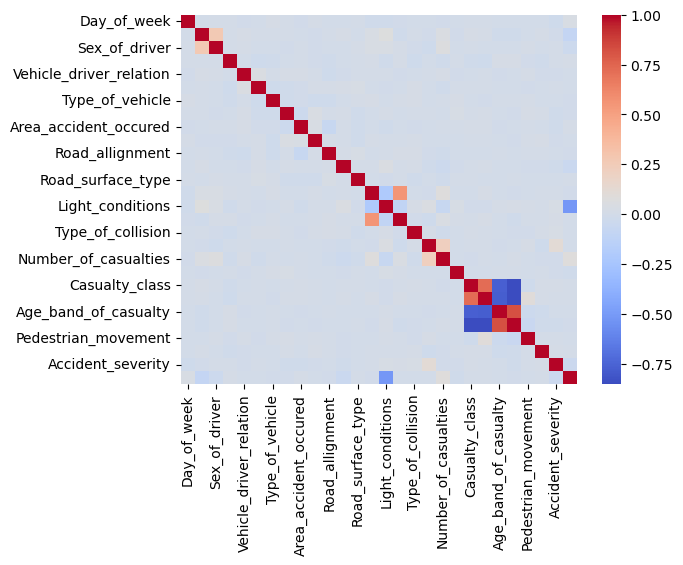

In [27]:
corr = df.corr(method = 'spearman')
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [28]:
#! pip install imbalanced-learn

In [86]:
target = 'Accident_severity'
# Separate the features and target
X = df.drop(target, axis=1)  # Features
y = df[target]  # Target

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply Random Oversampling to balance the classes
X_resampled, y_resampled = ros.fit_resample(X, y)


In [87]:
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after oversampling
class_distribution = df_resampled[target].value_counts()

## Baseline models without upsampling

In [40]:
def baseline_models(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Define a list of classifiers to evaluate
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        #'K-Nearest Neighbors': KNeighborsClassifier(),
        #'Support Vector Machine': SVC(),
        'Naive Bayes': GaussianNB()
        #'Neural Network': MLPClassifier()
    }
    
    # Initialize an empty DataFrame to store the results
    results = []
    
    # Evaluate each classifier and store the results
    for classifier_name, classifier in classifiers.items():
        classifier_results = {'Classifier': classifier_name}
        
        # Cross-validation scores for accuracy
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
        classifier_results['Accuracy'] = cv_scores.mean()
        
        # Additional evaluation metrics
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        classifier_results['Precision'] = precision_score(y_test, y_pred, average='weighted')
        classifier_results['Recall'] = recall_score(y_test, y_pred, average='weighted')
        classifier_results['F1 Score'] = f1_score(y_test, y_pred, average='weighted')
        
        results.append(classifier_results)
    
    # Display results in a tabular format
    print(tabulate(results, headers='keys', tablefmt='pretty'))
    

In [41]:
baseline_models(X, y)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|     Classifier      |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.8493017810559771 | 0.6967016977732949 | 0.834686586554076  | 0.7594776163724466 |
|    Decision Tree    | 0.7538186997986672 | 0.7648474592102951 | 0.7502435855797337 | 0.7571663715781662 |
|    Random Forest    | 0.8521167471763033 | 0.8168211183861217 | 0.8389087366027931 | 0.7718019213453323 |
|     Naive Bayes     | 0.6794796522733717 | 0.732281328371004  | 0.7869438129262748 | 0.7473371970794968 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


## Baseline models with upsampling

In [42]:
def baseline_models(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Define a list of classifiers to evaluate
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        #'K-Nearest Neighbors': KNeighborsClassifier(),
        #'Support Vector Machine': SVC(),
        'Naive Bayes': GaussianNB()
        #'Neural Network': MLPClassifier()
    }
    
    # Initialize an empty DataFrame to store the results
    results = []
    
    # Evaluate each classifier and store the results
    for classifier_name, classifier in classifiers.items():
        classifier_results = {'Classifier': classifier_name}
        
        # Cross-validation scores for accuracy
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
        classifier_results['Accuracy'] = cv_scores.mean()
        
        # Additional evaluation metrics
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        classifier_results['Precision'] = precision_score(y_test, y_pred, average='weighted')
        classifier_results['Recall'] = recall_score(y_test, y_pred, average='weighted')
        classifier_results['F1 Score'] = f1_score(y_test, y_pred, average='weighted')
        
        results.append(classifier_results)
    
    # Display results in a tabular format
    print(tabulate(results, headers='keys', tablefmt='pretty'))
    

In [43]:
baseline_models(X_resampled, y_resampled)

+---------------------+---------------------+---------------------+---------------------+---------------------+
|     Classifier      |      Accuracy       |      Precision      |       Recall        |      F1 Score       |
+---------------------+---------------------+---------------------+---------------------+---------------------+
| Logistic Regression | 0.4794519052298286  | 0.47740124937416595 | 0.4801587301587302  | 0.4748938375673195  |
|    Decision Tree    | 0.9213505158291007  | 0.9494731558665362  | 0.9440604198668715  | 0.9433672764672261  |
|    Random Forest    | 0.9823327315107095  | 0.9924529011939563  |  0.992447516641065  |  0.992446389801215  |
|     Naive Bayes     | 0.44454428987434574 | 0.4297692184925895  | 0.43727598566308246 | 0.42296798389819956 |
+---------------------+---------------------+---------------------+---------------------+---------------------+


## Visualising in 2-D (T-SNE)

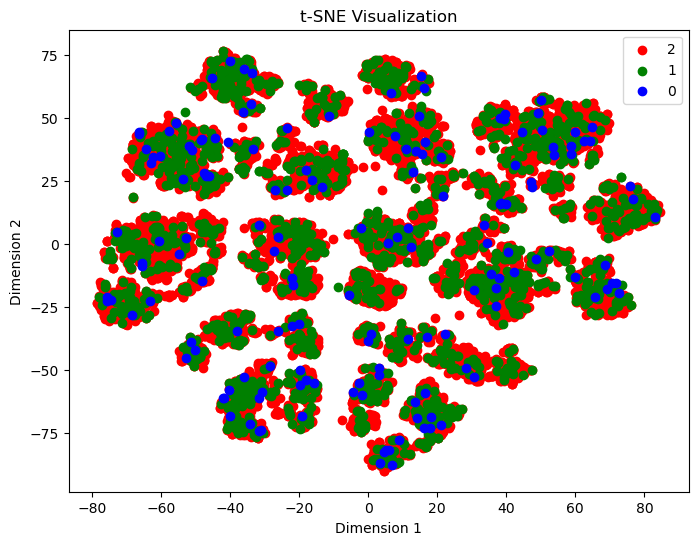

In [76]:
# Initialize the t-SNE model with 2 dimensions
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2 dimensions
X_2d = tsne.fit_transform(X)

# Create a DataFrame for the 2D data
df_2d = pd.DataFrame(data=X_2d, columns=['Dimension 1', 'Dimension 2'])

# Add the target labels to the DataFrame
df_2d['Target'] = y

# Plot the 2D data points with different colors for each class
plt.figure(figsize=(8, 6))
targets = df_2d['Target'].unique()
colors = ['r', 'g', 'b']  # You can extend this list for more classes
for target, color in zip(targets, colors):
    subset = df_2d[df_2d['Target'] == target]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], c=color, label=str(target))

plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


## Splitting into train & test

In [89]:
X.shape, y.shape, X_resampled.shape, y_resampled.shape

((12316, 27), (12316,), (31245, 27), (31245,))

In [90]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

## Trying out the polinomial models( might detect the overlapping data's)

In [51]:
poly = PolynomialFeatures(degree=2)

# Create a LogisticRegression classifier
classifier = LogisticRegression()

# Create a pipeline to first apply polynomial transformation and then logistic regression
model = Pipeline([
    ('poly', poly),
    ('classifier', classifier)
])
#
# Fit the model to the training data
model.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = model.predict(X_test_res)

# Calculate F1 score
f1_score_value = f1_score(y_test_res, pd.Series(y_pred), average='weighted')
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.5951567472328134


## Random Forest

In [91]:
def RF_CV(df_x, df_y):
    best = []

    param = { 
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [9, 11, 12, 13, 15],
        'criterion': ['gini', 'entropy'],
        'n_estimators': [400, 700, 900]
    }

    # Define a custom scorer for weighted F1 score
    weighted_f1_scorer = make_scorer(f1_score, average='weighted')

    clf1 = RandomizedSearchCV(
        estimator=RandomForestClassifier(),
        param_distributions=param,
        random_state=140,
        cv=3,
        n_iter=12,
        scoring=weighted_f1_scorer,
        refit=True,
        n_jobs = -1,
        return_train_score=True
    )

    clf1.fit(df_x, df_y)
    print(clf1.best_params_)
    print(clf1.best_score_)

    best.append(clf1.best_params_)

    results = pd.DataFrame.from_dict(clf1.cv_results_)
    results = results.sort_values(['param_max_depth'])
    train_pl = abs(results['mean_train_score'])
    train_pl_std = abs(results['std_train_score'])
    cv_pl = abs(results['mean_test_score'])
    cv_pl_std = abs(results['std_test_score'])
    alpha = abs(results['param_max_depth'])

    depth = results['param_max_depth'].values.tolist()
    plt.plot(depth, train_pl, label='Train')
    plt.plot(depth, cv_pl, label='CV')
    plt.scatter(depth, train_pl, label='Train points')
    plt.scatter(depth, cv_pl, label='CV points')
    plt.legend()
    plt.show()
    return clf1, results, best

# Example usage:
# clf, results, best_params = RF_CV(df_x, df_y)


{'n_estimators': 400, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
0.9591018109398387


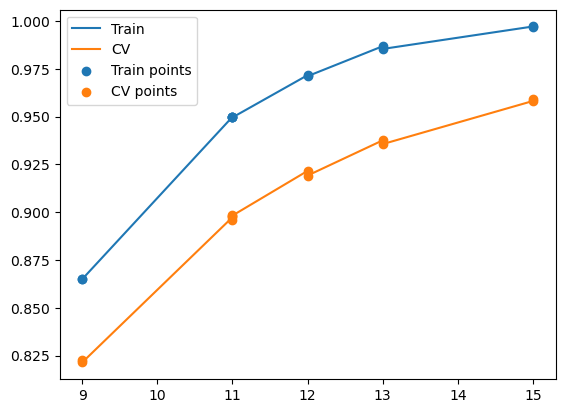

In [93]:
clf_rf ,results_rf ,best_rf = RF_CV(X_train_res, y_train_res)

In [95]:
best_esti = clf_rf.best_estimator_
print(best_esti)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=400)


In [96]:
results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.665047,0.114319,1.987462,0.054834,700,auto,9,gini,"{'n_estimators': 700, 'max_features': 'auto', ...",0.817606,0.812777,0.837765,0.822716,0.010822,11,0.861660,0.859222,0.875024,0.865302,0.006946
3,21.131276,0.235313,1.464694,0.157480,700,sqrt,9,entropy,"{'n_estimators': 700, 'max_features': 'sqrt', ...",0.816848,0.810504,0.836820,0.821391,0.011213,12,0.859895,0.858568,0.876267,0.864910,0.008049
2,10.960133,1.376724,0.961370,0.147819,400,sqrt,11,gini,"{'n_estimators': 400, 'max_features': 'sqrt', ...",0.896408,0.889222,0.906419,0.897350,0.007052,9,0.947943,0.946426,0.955131,0.949833,0.003797
5,13.606935,0.874908,1.013106,0.183616,400,auto,11,gini,"{'n_estimators': 400, 'max_features': 'auto', ...",0.895121,0.886760,0.905743,0.895874,0.007768,10,0.947554,0.944049,0.956991,0.949531,0.005466
9,13.456426,0.105270,1.081773,0.052543,400,auto,11,entropy,"{'n_estimators': 400, 'max_features': 'auto', ...",0.898566,0.891564,0.904865,0.898331,0.005433,7,0.947933,0.946383,0.954819,0.949712,0.003666
11,19.840948,0.111650,2.016936,0.009755,900,log2,11,entropy,"{'n_estimators': 900, 'max_features': 'log2', ...",0.896348,0.894271,0.904027,0.898215,0.004196,8,0.946690,0.948835,0.953068,0.949531,0.002650
7,27.663807,0.391461,2.597314,0.102373,900,log2,12,entropy,"{'n_estimators': 900, 'max_features': 'log2', ...",0.919891,0.915227,0.929623,0.921580,0.005998,5,0.968970,0.971788,0.974165,0.971641,0.002124
8,31.014630,0.585889,2.265289,0.434591,900,sqrt,12,entropy,"{'n_estimators': 900, 'max_features': 'sqrt', ...",0.918202,0.912314,0.926912,0.919143,0.005996,6,0.967811,0.970894,0.974611,0.971105,0.002780
1,12.294876,0.209881,1.609083,0.114744,400,sqrt,13,gini,"{'n_estimators': 400, 'max_features': 'sqrt', ...",0.936138,0.933071,0.943497,0.937569,0.004375,3,0.986167,0.985908,0.988280,0.986785,0.001062
4,16.900967,0.323699,1.191144,0.137768,400,auto,13,gini,"{'n_estimators': 400, 'max_features': 'auto', ...",0.934055,0.932711,0.940035,0.935601,0.003183,4,0.984950,0.985141,0.985974,0.985355,0.000445


In [97]:
def plot_confusion_matrix(y_test, y_hat_test):
    fig, axs = plt.subplots(1, 1, figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_hat_test), annot=True, fmt='d', cmap="Blues", ax=axs)
    axs.set_xlabel('Predicted Labels')
    axs.set_ylabel('Actual Labels')
    axs.set_title('Test Confusion Matrix', fontname="Brush Script MT", fontsize=25, pad=20)

    print("\nClassification Report:\n", classification_report(y_test, y_hat_test))
    
    plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2599
           1       0.97      0.98      0.97      2639
           2       0.98      0.96      0.97      2574

    accuracy                           0.98      7812
   macro avg       0.98      0.98      0.98      7812
weighted avg       0.98      0.98      0.98      7812



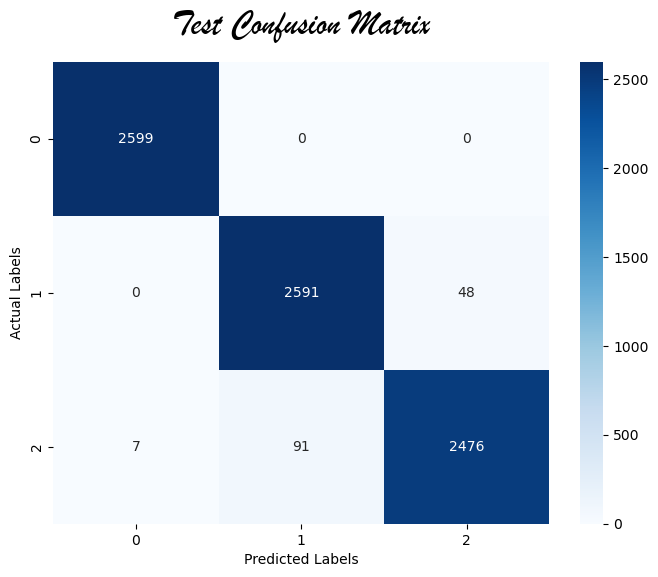

In [98]:
best_esti.fit(X_train_res, y_train_res)
y_hat_test = best_esti.predict(X_test_res)

plot_confusion_matrix(y_test_res, y_hat_test)

In [99]:
X_train_res.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Time_Category'],
      dtype='object')

In [100]:
feature_importances = best_esti.feature_importances_

In [101]:
top_10_indices = np.argsort(feature_importances)[-10:]

# Get the names of the top 10 features
top_10_features = X_train_res.columns[top_10_indices]

# Print the top 10 feature names
print("Top 10 Features:")
print(top_10_features)

Top 10 Features:
Index(['Area_accident_occured', 'Driving_experience', 'Time_Category',
       'Age_band_of_driver', 'Types_of_Junction', 'Type_of_vehicle',
       'Number_of_vehicles_involved', 'Cause_of_accident', 'Day_of_week',
       'Number_of_casualties'],
      dtype='object')


## RF on important features & saving the encoder to utilize in production

In [102]:
X_train_imp= X_train_res[['Area_accident_occured', 'Time_Category', 'Driving_experience',
       'Age_band_of_driver', 'Type_of_vehicle', 'Types_of_Junction',
       'Number_of_vehicles_involved', 'Cause_of_accident', 'Day_of_week',
       'Number_of_casualties']]
X_test_imp = X_test_res[['Area_accident_occured', 'Time_Category', 'Driving_experience',
       'Age_band_of_driver', 'Type_of_vehicle', 'Types_of_Junction',
       'Number_of_vehicles_involved', 'Cause_of_accident', 'Day_of_week',
       'Number_of_casualties']]


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2599
           1       0.93      0.97      0.95      2639
           2       0.96      0.92      0.94      2574

    accuracy                           0.96      7812
   macro avg       0.96      0.96      0.96      7812
weighted avg       0.96      0.96      0.96      7812



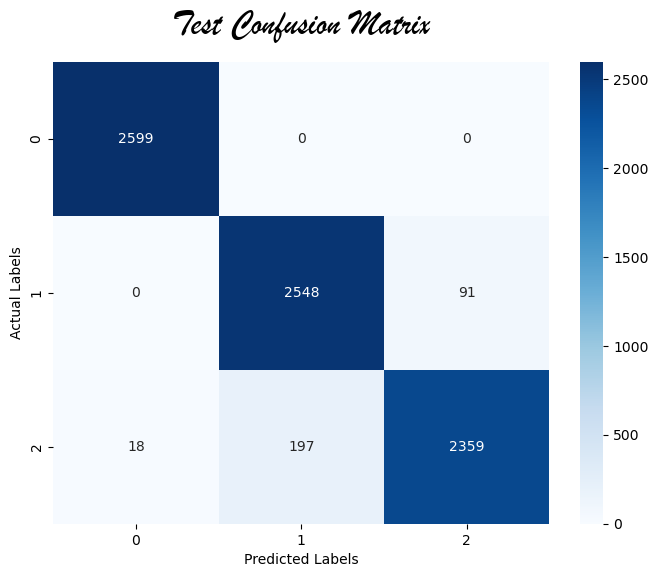

In [105]:
#best_esti.fit(X_train_imp, y_train_res)
model_imp = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=400)
model_imp.fit(X_train_imp, y_train_res)
y_hat_test = model_imp.predict(X_test_imp)

plot_confusion_matrix(y_test_res, y_hat_test)

In [110]:
dest_file_path = "../Model/random_forest_model.pkl"
# Save the trained RandomForestClassifier model
joblib.dump(model_imp, dest_file_path, compress=True)

['../Model/random_forest_model.pkl']